In [3]:
from math import sqrt, factorial, isnan
import warnings
import numpy as np
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import timeit
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = way = os.getcwd() + "/Validační tabulky/"

In [2]:
os.listdir(way1)

['.DS_Store',
 'No100.npy',
 'No100_info.npy',
 'No101.npy',
 'No101_info.npy',
 'No104.npy',
 'No104_info.npy',
 'No105.npy',
 'No105_info.npy',
 'No106.npy',
 'No106_info.npy',
 'No108.npy',
 'No108_info.npy',
 'No11.npy',
 'No110.npy',
 'No110_info.npy',
 'No111.npy',
 'No111_info.npy',
 'No114.npy',
 'No114_info.npy',
 'No116.npy',
 'No116_info.npy',
 'No117.npy',
 'No117_info.npy',
 'No118.npy',
 'No118_info.npy',
 'No119.npy',
 'No119_info.npy',
 'No120.npy',
 'No120_info.npy',
 'No126.npy',
 'No126_info.npy',
 'No127.npy',
 'No127_info.npy',
 'No128.npy',
 'No128_info.npy',
 'No130.npy',
 'No130_info.npy',
 'No132.npy',
 'No132_info.npy',
 'No133.npy',
 'No133_info.npy',
 'No137.npy',
 'No137_info.npy',
 'No138.npy',
 'No138_info.npy',
 'No140.npy',
 'No140_info.npy',
 'No141.npy',
 'No141_info.npy',
 'No146.npy',
 'No146_info.npy',
 'No154.npy',
 'No154_info.npy',
 'No160.npy',
 'No160_info.npy',
 'No164.npy',
 'No164_info.npy',
 'No165.npy',
 'No165_info.npy',
 'No170.npy',
 '

In [3]:
train_data = [np.load(way1 + "No100.npy"),np.load(way1 + "No101.npy"), np.load(way1 + "No108.npy"), np.load(way1 + "No324.npy") ]
test_data = [np.load(way1 + "No106.npy")]
print("done")

done


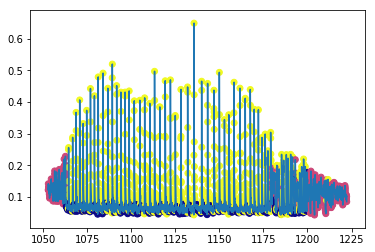

In [4]:
plt.plot(test_data[0][0], test_data[0][1])
plt.scatter(test_data[0][0], test_data[0][1], c = test_data[0][2], cmap = plt.cm.plasma)
plt.show()

In [5]:
st = time.time()
#HMM = GaussianHMM(2) # zavedu co potřebuju
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
#validace = CL.validuj(GaussianHMM(3), train_data[1], train_data[1], Labely, range(2,11)) #[0,0,1,1,1]
[validace, stavy, casf, casp] = CL.validuj(G_HMM, train_data, test_data, 10, [0,0,1,1,0], True)
ko = time.time()
print(ko-st)

9.288074016571045


In [6]:
casf

0.28209519386291504

In [10]:
validace.head()

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 1, 1, 0)",10,0.757603,821,0.877845,0.727926,0.571763,0.725845,0.825196,0.576423,0.97992,0.937671,0.987465,0.403639
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


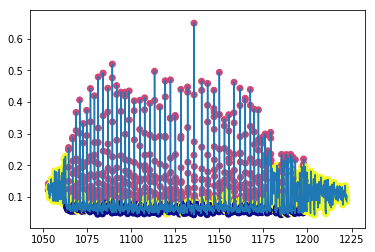

In [11]:
plt.figure("p.1")
plt.plot(test_data[0][0], test_data[0][1])
plt.scatter(test_data[0][0], test_data[0][1], c = stavy, cmap = plt.cm.plasma)
plt.show()

In [12]:
stavy

array([1, 1, 1, ..., 2, 2, 2])

In [5]:
trlist = np.load(way + "seznam.npy").tolist()

In [86]:
trlist

['No104.npy',
 'No105.npy',
 'No106.npy',
 'No108.npy',
 'No110.npy',
 'No111.npy',
 'No116.npy',
 'No117.npy',
 'No118.npy',
 'No119.npy']

In [87]:
del train_data,test_data
train_data = []
test_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))

test_data.append(np.load(way1 + "No11.npy"))    
train_data


[array([[  1.05168050e+03,   1.05173050e+03,   1.05178050e+03, ...,
           1.23133050e+03,   1.23138050e+03,   1.23143050e+03],
        [  1.36690834e-01,   1.31738837e-01,   1.56498822e-01, ...,
           1.41800037e-01,   1.24271541e-01,   1.07450472e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]]),
 array([[  1.05636050e+03,   1.05641050e+03,   1.05646050e+03, ...,
           1.21561050e+03,   1.21566050e+03,   1.21571050e+03],
        [  1.07922091e-01,   1.06035616e-01,   1.29302141e-01, ...,
           1.30638394e-01,   1.38027087e-01,   1.07293266e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]]),
 array([[  1.05295050e+03,   1.05300050e+03,   1.05305050e+03, ...,
           1.22215050e+03,   1.22220050e+03,   1.22225050e+03],
        [  1.22070653e-01,   1.41800037e-01,   1.24192937e-01, ...,
    

In [15]:
test_data

[array([[  1.05000050e+03,   1.05005050e+03,   1.05010050e+03, ...,
           1.19985050e+03,   1.19990050e+03,   1.19995050e+03],
        [  2.46342194e-01,   2.45398956e-01,   2.51687206e-01, ...,
           4.81758553e-01,   5.12570978e-01,   5.55331078e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])]

In [1]:
#validace = CL.validuj(G_HMM, train_data, test_data, range(2,20), unsupervised = True)

NameError: name 'CL' is not defined

In [16]:
#validace.to_csv(valid_path + 'prvni_Validace.csv',index=False)

In [25]:
validace = pd.read_csv(valid_path + "/prvni_Validace.csv")

In [26]:
validace.head()

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)",2,0.750000,750,0.918151,0.581290,0.296296,0.598579,0.859352,0.472674,0.598425,0.985588,0.754717,0.196891
1,"(0, 0, 0, 1, 0)",2,0.703667,889,0.882223,0.000000,0.420146,0.434123,0.792753,0.000000,0.430122,0.994457,0.000000,0.410622
2,"(0, 0, 0, 1, 1)",2,0.762000,714,0.912290,0.637218,0.311637,0.620382,0.844665,0.529687,0.652893,0.991685,0.799528,0.204663
3,"(0, 0, 1, 0, 0)",2,0.704667,886,0.882874,0.000000,0.423280,0.435385,0.793805,0.000000,0.432432,0.994457,0.000000,0.414508
4,"(0, 0, 1, 0, 1)",2,0.762000,714,0.912988,0.635426,0.311637,0.620017,0.845863,0.527216,0.652893,0.991685,0.799528,0.204663


In [32]:
validace.head(2).transpose()

,0,1
Kombinace rysů,"(0, 0, 0, 0, 1)","(0, 0, 0, 1, 0)"
délka úseku,2,2
Accuracy,0.75,0.703667
Chyby,750,889
F míra stavu 0,0.918151,0.882223
F míra stavu 1,0.58129,0
F míra stavu 2,0.296296,0.420146
F míra průměrná,0.598579,0.434123
Precision stavu 0,0.859352,0.792753
Precision stavu 1,0.472674,0


In [22]:
Sorted = validace.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
200,"(0, 1, 1, 1, 1)",8,0.869333,392,0.961210,0.726786,0.729317,0.805771,0.954123,0.584770,0.959831,0.968404,0.959906,0.588083
188,"(0, 0, 0, 1, 1)",8,0.866667,400,0.944280,0.772388,0.712284,0.809651,0.917844,0.638889,0.979592,0.972284,0.976415,0.559585
190,"(0, 0, 1, 0, 1)",8,0.866333,401,0.944594,0.773532,0.708023,0.808716,0.917450,0.639445,0.979405,0.973392,0.978774,0.554404
219,"(0, 0, 0, 1, 1)",9,0.866000,402,0.944899,0.754338,0.731235,0.810157,0.930183,0.615499,0.970021,0.960089,0.974057,0.586788
250,"(0, 0, 0, 1, 1)",10,0.864667,406,0.941079,0.740807,0.755906,0.812597,0.939260,0.597685,0.963855,0.942905,0.974057,0.621762
169,"(0, 1, 1, 1, 1)",7,0.863667,409,0.958129,0.731085,0.698776,0.795997,0.940235,0.595840,0.944812,0.976718,0.945755,0.554404
221,"(0, 0, 1, 0, 1)",9,0.863333,410,0.945217,0.749321,0.721044,0.805194,0.929759,0.607930,0.973568,0.961197,0.976415,0.572539
157,"(0, 0, 0, 1, 1)",7,0.862333,413,0.939862,0.786325,0.684609,0.803598,0.903787,0.658188,0.976019,0.978936,0.976415,0.527202
231,"(0, 1, 1, 1, 1)",9,0.861667,415,0.958147,0.697232,0.738095,0.797825,0.964607,0.550546,0.952869,0.951774,0.950472,0.602332
192,"(0, 0, 1, 1, 1)",8,0.861000,417,0.945682,0.744526,0.710311,0.800173,0.927050,0.607143,0.964444,0.965078,0.962264,0.562176


In [16]:
st = time.time()
#HMM = GaussianHMM(2) # zavedu co potřebuju
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
#validace = CL.validuj(GaussianHMM(3), train_data[1], train_data[1], Labely, range(2,11)) #[0,0,1,1,1]
[validace, stavy, casf, casp] = CL.validuj(G_HMM, train_data, test_data, 16, [0,0,1,0,1], True)
ko = time.time()
print(ko-st)

1.890261173248291


In [17]:
validace.head()

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 1, 0, 1)",16,0.866,402,0.938991,0.750916,0.760369,0.816758,0.939512,0.613772,0.933962,0.93847,0.966981,0.641192
1,0,0,0.000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


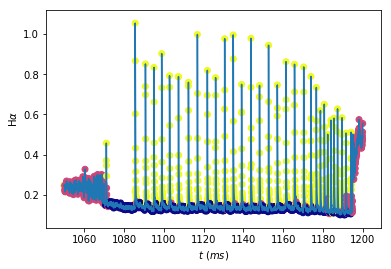

In [21]:
stavy = np.load("stavy.npy")
test_data=np.load(way1 + "No11.npy")
plt.figure("p.1")
plt.plot(test_data[0][0], test_data[0][1])
plt.scatter(test_data[0][0], test_data[0][1], c = stavy, cmap = plt.cm.plasma)
plt.ylabel(r'H$\alpha$')
plt.xlabel(r'$t \ (ms)$')
plt.show()

## před optimalizací fce validace trvala 22.491228818893433 na 1.4766972064971924 :D:D:D:D

In [11]:
casf


1.0834977626800537

In [12]:
casp

0.0020411014556884766

## Test po úpravách

In [13]:
validace = CL.validuj(G_HMM, train_data, test_data, range(2,20), unsupervised = True)

[1 0 0 ..., 2 2 2]
1
[2 1 1 ..., 1 1 1]
2
[0 1 1 ..., 2 2 2]
3
[1 2 2 ..., 2 2 2]
4
[0 2 2 ..., 1 1 1]
5
[1 2 2 ..., 1 1 1]
6
[2 0 0 ..., 2 2 2]
7
[2 1 1 ..., 1 1 1]
8
[2 2 2 ..., 1 1 1]
9
[2 2 2 ..., 1 1 1]
10
[0 0 0 ..., 2 2 2]
11
[2 2 2 ..., 1 1 1]
12
[0 0 0 ..., 1 1 1]
13
[2 1 1 ..., 2 2 2]
14
[1 2 2 ..., 1 1 1]
15
[1 2 2 ..., 2 2 2]
16
[1 0 0 ..., 2 2 2]
17
[0 0 0 ..., 2 2 2]
18
[0 1 1 ..., 2 2 2]
19
[2 2 2 ..., 1 1 1]
20
[0 0 0 ..., 2 2 2]
21
[1 0 0 ..., 1 1 1]
22
[1 2 2 ..., 1 1 1]
23
[0 0 0 ..., 1 1 1]
24
[1 1 1 ..., 2 2 2]
25
[1 1 1 ..., 2 2 2]
26
[0 0 0 ..., 1 1 1]
27
[2 2 2 ..., 1 1 1]
28
[0 0 0 ..., 1 1 1]
29
[2 1 1 ..., 2 2 2]
30
[2 1 1 ..., 2 2 2]
31
[0 1 1 ..., 2 2 2]
1
[2 1 1 ..., 1 1 1]
2
[1 0 0 ..., 2 2 2]
3
[1 2 2 ..., 2 2 2]
4
[1 1 1 ..., 2 2 2]
5
[0 0 2 ..., 0 0 0]
6
[0 0 2 ..., 0 0 0]
7
[2 1 1 ..., 1 1 1]
8
[0 0 0 ..., 2 2 2]
9
[2 2 2 ..., 1 1 1]
10
[2 2 2 ..., 1 1 1]
11
[2 2 2 ..., 0 0 0]
12
[2 2 2 ..., 0 0 0]
13
[2 2 1 ..., 2 2 2]
14
[1 1 2 ..., 1 1 1]
15
[1 2 2

6
[0 0 0 ..., 0 0 0]
7
[2 1 1 ..., 1 1 1]
8
[1 2 2 ..., 2 2 2]
9
[0 0 0 ..., 2 2 2]
10
[2 2 2 ..., 2 2 2]
11
[2 2 2 ..., 0 0 0]
12
[2 2 2 ..., 2 2 2]
13
[1 2 2 ..., 1 1 1]
14
[2 2 2 ..., 2 2 2]
15
[1 2 2 ..., 2 2 2]
16
[0 2 2 ..., 1 1 1]
17
[1 1 1 ..., 2 2 2]
18
[1 2 2 ..., 2 2 2]
19
[2 2 2 ..., 1 1 1]
20
[2 2 2 ..., 2 2 2]
21
[0 0 0 ..., 0 0 0]
22
[0 0 0 ..., 0 0 0]
23
[2 2 2 ..., 1 1 1]
24
[0 0 0 ..., 1 1 1]
25
[2 2 2 ..., 1 1 1]
26
[0 0 0 ..., 1 1 1]
27
[1 1 1 ..., 2 2 2]
28
[2 2 2 ..., 2 2 2]
29
[0 0 0 ..., 0 0 0]
30
[2 2 2 ..., 2 2 2]
31
[0 1 1 ..., 2 2 2]
1
[2 2 2 ..., 2 1 1]
2
[2 0 0 ..., 0 0 0]
3
[2 2 2 ..., 2 2 2]
4
[2 2 2 ..., 2 2 2]
5
[2 2 2 ..., 0 2 2]
6
[0 0 0 ..., 0 0 0]
7
[2 1 1 ..., 1 1 1]
8
[0 2 2 ..., 2 2 2]
9
[1 1 1 ..., 2 2 2]
10
[0 2 2 ..., 2 2 2]
11
[1 1 1 ..., 2 2 2]
12
[0 0 0 ..., 0 0 0]
13
[0 1 1 ..., 0 0 0]
14
[1 1 1 ..., 1 1 1]
15
[1 2 2 ..., 2 2 2]
16
[0 1 1 ..., 2 2 2]
17
[1 1 1 ..., 2 2 2]
18
[0 1 1 ..., 1 1 1]
19
[1 2 2 ..., 2 2 2]
20
[0 2 2 ..., 0 0 0]
2

In [15]:
#validace.to_csv(valid_path+'druha_Validace.csv',index=False)

In [2]:
validace = pd.read_csv(valid_path +"/druha_Validace.csv")

In [3]:
Sorted = validace.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
407,"(0, 0, 1, 0, 1)",15,0.867333,398,0.942991,0.754786,0.748428,0.815401,0.937055,0.615156,0.952000,0.949002,0.976415,0.616580
376,"(0, 0, 1, 0, 1)",14,0.866333,401,0.943777,0.760770,0.730924,0.811824,0.929570,0.622189,0.961945,0.958426,0.978774,0.589378
438,"(0, 0, 1, 0, 1)",16,0.866000,402,0.938991,0.750916,0.760369,0.816758,0.939512,0.613772,0.933962,0.938470,0.966981,0.641192
314,"(0, 0, 1, 0, 1)",12,0.864333,407,0.946347,0.766390,0.700331,0.804356,0.921260,0.629742,0.970183,0.972838,0.978774,0.547927
345,"(0, 0, 1, 0, 1)",13,0.864000,408,0.944052,0.760073,0.716150,0.806758,0.925453,0.621257,0.966960,0.963415,0.978774,0.568653
469,"(0, 0, 1, 0, 1)",17,0.862000,414,0.936087,0.739574,0.762332,0.812664,0.942664,0.609160,0.901060,0.929601,0.941038,0.660622
436,"(0, 0, 0, 1, 1)",16,0.861333,416,0.935159,0.736842,0.765565,0.812522,0.943067,0.592539,0.941399,0.927384,0.974057,0.645078
343,"(0, 0, 0, 1, 1)",13,0.859333,422,0.943303,0.739286,0.719284,0.800624,0.932323,0.594828,0.967177,0.954545,0.976415,0.572539
405,"(0, 0, 0, 1, 1)",15,0.859333,422,0.937743,0.732270,0.750392,0.806802,0.940357,0.586648,0.952191,0.935144,0.974057,0.619171
312,"(0, 0, 0, 1, 1)",12,0.859000,423,0.943991,0.745946,0.704620,0.798186,0.926361,0.603499,0.970455,0.962306,0.976415,0.553109


In [4]:
Sorted = validace.sort_values(['F míra průměrná'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
438,"(0, 0, 1, 0, 1)",16,0.866000,402,0.938991,0.750916,0.760369,0.816758,0.939512,0.613772,0.933962,0.938470,0.966981,0.641192
407,"(0, 0, 1, 0, 1)",15,0.867333,398,0.942991,0.754786,0.748428,0.815401,0.937055,0.615156,0.952000,0.949002,0.976415,0.616580
498,"(0, 0, 0, 1, 1)",18,0.856333,431,0.924212,0.734222,0.781065,0.813167,0.947062,0.589158,0.910345,0.902439,0.974057,0.683938
469,"(0, 0, 1, 0, 1)",17,0.862000,414,0.936087,0.739574,0.762332,0.812664,0.942664,0.609160,0.901060,0.929601,0.941038,0.660622
436,"(0, 0, 0, 1, 1)",16,0.861333,416,0.935159,0.736842,0.765565,0.812522,0.943067,0.592539,0.941399,0.927384,0.974057,0.645078
467,"(0, 0, 0, 1, 1)",17,0.858000,426,0.928632,0.732919,0.775602,0.812385,0.945434,0.587482,0.926259,0.912417,0.974057,0.667098
376,"(0, 0, 1, 0, 1)",14,0.866333,401,0.943777,0.760770,0.730924,0.811824,0.929570,0.622189,0.961945,0.958426,0.978774,0.589378
529,"(0, 0, 0, 1, 1)",19,0.853667,439,0.921670,0.728738,0.782671,0.811026,0.951594,0.587302,0.884176,0.893570,0.959906,0.702073
500,"(0, 0, 1, 0, 1)",18,0.859000,423,0.932884,0.735675,0.763449,0.810669,0.945361,0.604863,0.885470,0.920732,0.938679,0.670984
405,"(0, 0, 0, 1, 1)",15,0.859333,422,0.937743,0.732270,0.750392,0.806802,0.940357,0.586648,0.952191,0.935144,0.974057,0.619171


In [5]:
#Sorted.head(10).to_csv('Prezentace.csv',index=False)

In [2]:
prezentace = pd.read_csv(os.getcwd()+"/Prezentace.csv")

In [3]:
prezentace

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 1, 0, 1)",16,0.866000,402,0.938991,0.750916,0.760369,0.816758,0.939512,0.613772,0.933962,0.938470,0.966981,0.641192
1,"(0, 0, 1, 0, 1)",15,0.867333,398,0.942991,0.754786,0.748428,0.815401,0.937055,0.615156,0.952000,0.949002,0.976415,0.616580
2,"(0, 0, 0, 1, 1)",18,0.856333,431,0.924212,0.734222,0.781065,0.813167,0.947062,0.589158,0.910345,0.902439,0.974057,0.683938
3,"(0, 0, 1, 0, 1)",17,0.862000,414,0.936087,0.739574,0.762332,0.812664,0.942664,0.609160,0.901060,0.929601,0.941038,0.660622
4,"(0, 0, 0, 1, 1)",16,0.861333,416,0.935159,0.736842,0.765565,0.812522,0.943067,0.592539,0.941399,0.927384,0.974057,0.645078
5,"(0, 0, 0, 1, 1)",17,0.858000,426,0.928632,0.732919,0.775602,0.812385,0.945434,0.587482,0.926259,0.912417,0.974057,0.667098
6,"(0, 0, 1, 0, 1)",14,0.866333,401,0.943777,0.760770,0.730924,0.811824,0.929570,0.622189,0.961945,0.958426,0.978774,0.589378
7,"(0, 0, 0, 1, 1)",19,0.853667,439,0.921670,0.728738,0.782671,0.811026,0.951594,0.587302,0.884176,0.893570,0.959906,0.702073
8,"(0, 0, 1, 0, 1)",18,0.859000,423,0.932884,0.735675,0.763449,0.810669,0.945361,0.604863,0.885470,0.920732,0.938679,0.670984
9,"(0, 0, 0, 1, 1)",15,0.859333,422,0.937743,0.732270,0.750392,0.806802,0.940357,0.586648,0.952191,0.935144,0.974057,0.619171


In [4]:
prezentace.to_latex()

'\\begin{tabular}{llrrrrrrrrrrrrr}\n\\toprule\n{} &   Kombinace rysů &  délka úseku &  Accuracy &  Chyby &  F míra stavu 0 &  F míra stavu 1 &  F míra stavu 2 &  F míra průměrná &  Precision stavu 0 &  Precision stavu 1 &  Precision stavu 2 &  Recall stavu 0 &  Recall stavu 1 &  Recall stavu 2 \\\\\n\\midrule\n0 &  (0, 0, 1, 0, 1) &           16 &  0.866000 &    402 &        0.938991 &        0.750916 &        0.760369 &         0.816758 &           0.939512 &           0.613772 &           0.933962 &        0.938470 &        0.966981 &        0.641192 \\\\\n1 &  (0, 0, 1, 0, 1) &           15 &  0.867333 &    398 &        0.942991 &        0.754786 &        0.748428 &         0.815401 &           0.937055 &           0.615156 &           0.952000 &        0.949002 &        0.976415 &        0.616580 \\\\\n2 &  (0, 0, 0, 1, 1) &           18 &  0.856333 &    431 &        0.924212 &        0.734222 &        0.781065 &         0.813167 &           0.947062 &           0.589158 &         

In [5]:
prezentace.transpose()

,0,1,2,3,4,5,6,7,8,9
Kombinace rysů,"(0, 0, 1, 0, 1)","(0, 0, 1, 0, 1)","(0, 0, 0, 1, 1)","(0, 0, 1, 0, 1)","(0, 0, 0, 1, 1)","(0, 0, 0, 1, 1)","(0, 0, 1, 0, 1)","(0, 0, 0, 1, 1)","(0, 0, 1, 0, 1)","(0, 0, 0, 1, 1)"
délka úseku,16,15,18,17,16,17,14,19,18,15
Accuracy,0.866,0.867333,0.856333,0.862,0.861333,0.858,0.866333,0.853667,0.859,0.859333
Chyby,402,398,431,414,416,426,401,439,423,422
F míra stavu 0,0.938991,0.942991,0.924212,0.936087,0.935159,0.928632,0.943777,0.92167,0.932884,0.937743
F míra stavu 1,0.750916,0.754786,0.734222,0.739574,0.736842,0.732919,0.76077,0.728738,0.735675,0.73227
F míra stavu 2,0.760369,0.748428,0.781065,0.762332,0.765565,0.775602,0.730924,0.782671,0.763449,0.750392
F míra průměrná,0.816758,0.815401,0.813167,0.812664,0.812522,0.812385,0.811824,0.811026,0.810669,0.806802
Precision stavu 0,0.939512,0.937055,0.947062,0.942664,0.943067,0.945434,0.92957,0.951594,0.945361,0.940357
Precision stavu 1,0.613772,0.615156,0.589158,0.60916,0.592539,0.587482,0.622189,0.587302,0.604863,0.586648


In [8]:
prezentace.head(5).transpose().to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} &                0 &                1 &                2 &                3 &                4 \\\\\n\\midrule\nKombinace rysů    &  (0, 0, 1, 0, 1) &  (0, 0, 1, 0, 1) &  (0, 0, 0, 1, 1) &  (0, 0, 1, 0, 1) &  (0, 0, 0, 1, 1) \\\\\ndélka úseku       &               16 &               15 &               18 &               17 &               16 \\\\\nAccuracy          &            0.866 &         0.867333 &         0.856333 &            0.862 &         0.861333 \\\\\nChyby             &              402 &              398 &              431 &              414 &              416 \\\\\nF míra stavu 0    &         0.938991 &         0.942991 &         0.924212 &         0.936087 &         0.935159 \\\\\nF míra stavu 1    &         0.750916 &         0.754786 &         0.734222 &         0.739574 &         0.736842 \\\\\nF míra stavu 2    &         0.760369 &         0.748428 &         0.781065 &         0.762332 &         0.765565 \\\\\nF míra průměrn

# Cross-fold validation

In [11]:
print(test_data)
print(len(train_data))

[array([[  1.05000050e+03,   1.05005050e+03,   1.05010050e+03, ...,
          1.19985050e+03,   1.19990050e+03,   1.19995050e+03],
       [  2.46342194e-01,   2.45398956e-01,   2.51687206e-01, ...,
          4.81758553e-01,   5.12570978e-01,   5.55331078e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])]
10


In [14]:
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
for i in range(len(train_data)):
    fold = copy(train_data)
    test = copy(test_data)
    tmp = fold[i]
    fold[i] = test[0]
    test[0] = tmp
    valid = CL.validuj(G_HMM, fold, test, range(2,20), unsupervised = True)
    valid.to_csv(valid_path + 'Validace_'+str(i)+'.csv',index=False)
    print(str(i)+". fold je hotový")

    

[2 0 0 ..., 0 0 0]
1
[2 2 2 ..., 2 2 2]
2
[1 0 0 ..., 0 0 0]
3
[2 2 2 ..., 2 2 2]
4
[2 0 0 ..., 0 0 0]
5
[2 0 0 ..., 1 1 1]
6
[2 1 1 ..., 0 1 1]
7
[1 1 1 ..., 1 0 0]
8
[1 0 0 ..., 0 0 0]
9
[0 0 0 ..., 0 0 0]
10
[1 1 1 ..., 0 0 0]
11
[1 1 1 ..., 1 1 1]
12
[1 1 1 ..., 0 0 0]
13
[1 0 0 ..., 0 0 0]
14
[1 0 1 ..., 0 0 0]
15
[2 2 2 ..., 2 2 2]
16
[1 1 1 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[2 2 2 ..., 1 1 1]
19
[1 1 1 ..., 1 1 1]
20
[1 1 1 ..., 0 0 0]
21
[0 2 2 ..., 1 1 1]
22
[2 0 0 ..., 1 0 0]
23
[1 1 1 ..., 1 1 1]
24
[2 2 2 ..., 0 0 0]
25
[2 2 2 ..., 2 2 2]
26
[2 2 2 ..., 0 0 0]
27
[0 0 0 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[1 2 2 ..., 0 0 0]
30
[1 0 1 ..., 0 0 0]
31
[1 0 0 ..., 0 0 0]
1
[0 0 0 ..., 0 0 0]
2
[2 2 2 ..., 0 0 0]
3
[2 2 2 ..., 2 2 2]
4
[0 0 0 ..., 2 2 2]
5
[2 2 1 ..., 0 0 0]
6
[1 1 2 ..., 0 0 0]
7
[2 2 2 ..., 2 0 0]
8
[1 0 0 ..., 0 0 0]
9
[1 1 1 ..., 1 1 1]
10
[2 2 2 ..., 2 2 2]
11
[2 2 2 ..., 2 2 2]
12
[2 2 2 ..., 2 2 2]
13
[2 2 1 ..., 1 1 1]
14
[1 1 2 ..., 2 2 2]
15
[1 1 1

6
[1 1 1 ..., 0 0 0]
7
[1 1 1 ..., 1 0 0]
8
[2 0 0 ..., 0 0 0]
9
[2 2 2 ..., 1 2 2]
10
[2 0 0 ..., 0 0 0]
11
[2 2 2 ..., 2 2 2]
12
[1 1 1 ..., 0 0 0]
13
[1 2 2 ..., 1 1 1]
14
[2 2 2 ..., 1 2 2]
15
[2 2 2 ..., 2 2 2]
16
[1 1 1 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[1 0 0 ..., 0 0 0]
19
[0 0 0 ..., 0 0 0]
20
[1 1 2 ..., 0 0 0]
21
[1 1 1 ..., 2 1 1]
22
[2 2 2 ..., 0 0 0]
23
[2 2 2 ..., 2 2 2]
24
[0 0 0 ..., 1 1 1]
25
[0 0 0 ..., 0 0 0]
26
[1 0 0 ..., 0 0 0]
27
[1 1 1 ..., 1 1 1]
28
[1 1 1 ..., 0 0 0]
29
[1 1 1 ..., 1 1 1]
30
[1 1 1 ..., 0 1 1]
31
[1 0 0 ..., 0 0 0]
1
[1 1 1 ..., 0 0 0]
2
[0 1 1 ..., 1 1 1]
3
[1 1 1 ..., 2 2 0]
4
[1 1 1 ..., 2 2 2]
5
[1 1 1 ..., 0 0 0]
6
[0 0 0 ..., 1 1 1]
7
[2 2 2 ..., 2 0 0]
8
[1 0 0 ..., 0 0 0]
9
[0 0 0 ..., 0 0 0]
10
[2 0 0 ..., 0 0 0]
11
[2 2 2 ..., 2 2 2]
12
[1 1 1 ..., 0 0 0]
13
[2 0 0 ..., 2 2 2]
14
[0 0 0 ..., 1 0 0]
15
[0 0 0 ..., 0 0 0]
16
[1 1 1 ..., 0 0 0]
17
[0 0 0 ..., 0 0 0]
18
[0 1 1 ..., 1 1 1]
19
[2 1 1 ..., 1 1 1]
20
[2 2 2 ..., 1 1 1]
2

11
[2 2 2 ..., 2 2 2]
12
[1 1 1 ..., 0 1 1]
13
[2 2 2 ..., 1 0 0]
14
[2 2 2 ..., 1 0 0]
15
[1 1 1 ..., 0 1 1]
16
[2 2 2 ..., 2 2 0]
17
[0 0 0 ..., 0 1 1]
18
[0 0 0 ..., 0 2 2]
19
[1 1 1 ..., 0 1 1]
20
[0 0 1 ..., 1 0 0]
21
[2 2 2 ..., 0 0 0]
22
[2 2 2 ..., 1 1 1]
23
[1 1 1 ..., 1 1 1]
24
[2 0 0 ..., 0 2 2]
25
[0 1 1 ..., 0 0 0]
26
[0 0 0 ..., 0 2 2]
27
[0 0 0 ..., 0 0 0]
28
[1 1 1 ..., 0 1 1]
29
[1 1 1 ..., 1 1 1]
30
[2 2 2 ..., 0 2 2]
31
[2 2 2 ..., 2 2 2]
1
[0 0 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[0 0 0 ..., 1 1 1]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[0 0 0 ..., 0 0 0]
8
[2 0 0 ..., 0 2 2]
9
[0 1 1 ..., 0 0 0]
10
[1 1 1 ..., 1 0 0]
11
[2 2 2 ..., 2 2 2]
12
[2 2 2 ..., 0 2 2]
13
[1 1 1 ..., 2 2 2]
14
[1 1 1 ..., 2 1 1]
15
[0 0 0 ..., 1 0 0]
16
[0 0 0 ..., 0 0 2]
17
[0 0 0 ..., 0 2 2]
18
[2 2 2 ..., 2 0 0]
19
[2 2 2 ..., 0 2 2]
20
[1 1 1 ..., 0 1 1]
21
[2 2 2 ..., 0 2 2]
22
[0 0 0 ..., 1 1 0]
23
[0 0 0 ..., 0 0 0]
24
[2 0 0 ..., 0 2 2]
25
[1 0 0 ..., 1 1 

16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[2 2 2 ..., 0 0 0]
20
[0 1 1 ..., 1 1 1]
21
[2 1 0 ..., 0 0 0]
22
[1 0 0 ..., 2 2 2]
23
[2 2 0 ..., 0 0 0]
24
[1 1 0 ..., 0 0 0]
25
[2 2 1 ..., 1 1 2]
26
[2 2 1 ..., 1 1 2]
27
[2 2 0 ..., 0 0 2]
28
[0 0 1 ..., 1 1 0]
29
[1 2 0 ..., 0 0 0]
30
[2 0 0 ..., 1 1 0]
31
[0 0 0 ..., 0 0 0]
1
[1 1 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[1 0 0 ..., 0 0 0]
4
[0 0 0 ..., 0 0 0]
5
[2 2 0 ..., 1 1 1]
6
[1 1 2 ..., 0 0 0]
7
[1 1 0 ..., 0 0 0]
8
[2 2 0 ..., 0 0 0]
9
[2 2 0 ..., 0 2 2]
10
[2 2 0 ..., 0 0 2]
11
[2 2 0 ..., 0 2 2]
12
[2 2 0 ..., 0 0 2]
13
[2 2 1 ..., 0 0 1]
14
[2 2 1 ..., 0 0 1]
15
[1 1 1 ..., 0 0 0]
16
[2 2 2 ..., 2 2 2]
17
[1 0 0 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[2 0 0 ..., 0 0 0]
20
[2 0 0 ..., 0 0 0]
21
[2 2 1 ..., 0 0 0]
22
[1 1 2 ..., 0 0 0]
23
[0 0 1 ..., 1 1 1]
24
[1 1 0 ..., 0 0 0]
25
[2 2 0 ..., 0 0 2]
26
[1 1 0 ..., 0 0 1]
27
[1 1 0 ..., 0 0 1]
28
[1 1 0 ..., 0 0 1]
29
[0 0 2 ..., 1 1 2]
30
[1 1 0 ..., 0 0 

22
[2 2 2 ..., 0 0 0]
23
[1 1 0 ..., 0 0 0]
24
[0 0 2 ..., 2 2 2]
25
[0 0 2 ..., 2 2 0]
26
[1 0 0 ..., 0 0 0]
27
[1 1 1 ..., 0 0 1]
28
[2 2 2 ..., 1 1 1]
29
[1 1 1 ..., 0 0 1]
30
[2 2 2 ..., 0 0 2]
31
[0 0 0 ..., 0 0 0]
1
[0 0 0 ..., 0 0 0]
2
[1 1 1 ..., 1 1 1]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 1 1 1]
6
[1 1 1 ..., 0 0 0]
7
[2 2 0 ..., 0 0 0]
8
[0 0 0 ..., 0 0 0]
9
[2 2 0 ..., 0 0 2]
10
[0 0 0 ..., 0 0 0]
11
[2 2 2 ..., 1 1 2]
12
[1 1 1 ..., 0 0 0]
13
[0 1 1 ..., 2 2 0]
14
[0 0 0 ..., 1 1 0]
15
[1 1 1 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[2 2 2 ..., 0 0 0]
20
[1 1 1 ..., 0 0 0]
21
[2 2 2 ..., 1 1 1]
22
[0 0 0 ..., 1 1 1]
23
[1 1 0 ..., 0 0 0]
24
[0 0 2 ..., 2 2 2]
25
[0 0 1 ..., 1 1 0]
26
[1 0 0 ..., 0 0 0]
27
[2 2 2 ..., 0 0 2]
28
[2 2 2 ..., 0 0 0]
29
[1 1 1 ..., 0 0 1]
30
[0 0 0 ..., 2 2 0]
31
[0 0 0 ..., 0 0 0]
1
[1 1 1 ..., 1 1 1]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 1 1 1]
5
[1 1 1 ..., 0 0 0]
6


27
[1 1 1 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[2 2 2 ..., 0 0 0]
30
[2 2 2 ..., 0 0 0]
31
[1 1 1 ..., 1 1 1]
1
[0 0 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 0 0 0]
4
[1 1 1 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[0 2 2 ..., 2 2 2]
8
[1 1 1 ..., 1 1 1]
9
[1 2 2 ..., 2 2 2]
10
[0 0 0 ..., 0 0 0]
11
[2 2 2 ..., 0 0 0]
12
[1 1 1 ..., 0 0 0]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 1 1 1]
15
[1 0 0 ..., 0 0 0]
16
[1 1 1 ..., 1 1 1]
17
[1 1 1 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[1 1 1 ..., 0 0 0]
20
[0 0 0 ..., 2 2 2]
21
[1 1 1 ..., 0 0 0]
22
[1 1 1 ..., 0 0 0]
23
[1 0 0 ..., 0 0 0]
24
[0 0 0 ..., 0 0 0]
25
[0 1 1 ..., 1 1 1]
26
[0 0 0 ..., 0 0 0]
27
[2 2 2 ..., 1 1 1]
28
[0 0 0 ..., 1 1 1]
29
[2 2 2 ..., 1 1 1]
30
[1 1 1 ..., 0 0 0]
31
[2 2 2 ..., 2 2 2]
1
[0 0 0 ..., 0 0 0]
2
[1 1 1 ..., 1 1 1]
3
[1 1 1 ..., 0 0 0]
4
[1 1 1 ..., 0 0 0]
5
[0 0 0 ..., 1 1 1]
6
[0 0 0 ..., 1 1 1]
7
[0 1 1 ..., 1 1 1]
8
[2 2 2 ..., 2 2 2]
9
[1 0 0 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[2 

1
[0 0 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 2 2 2]
4
[1 2 2 ..., 1 1 1]
5
[1 1 2 ..., 0 0 0]
6
[0 0 2 ..., 1 1 1]
7
[2 2 2 ..., 2 2 2]
8
[0 0 0 ..., 2 2 2]
9
[2 2 2 ..., 0 0 0]
10
[0 0 0 ..., 1 1 1]
11
[1 1 1 ..., 0 0 0]
12
[2 2 2 ..., 0 0 0]
13
[2 2 1 ..., 0 0 0]
14
[2 2 1 ..., 0 0 0]
15
[2 2 2 ..., 2 2 2]
16
[1 1 1 ..., 1 1 1]
17
[2 2 2 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[0 0 0 ..., 1 1 1]
20
[1 1 1 ..., 2 2 2]
21
[2 2 0 ..., 1 1 1]
22
[1 1 2 ..., 0 0 0]
23
[1 1 1 ..., 0 0 0]
24
[2 2 2 ..., 0 0 0]
25
[1 1 1 ..., 0 0 0]
26
[1 1 0 ..., 0 0 0]
27
[1 1 1 ..., 0 0 0]
28
[2 2 0 ..., 0 0 0]
29
[2 2 0 ..., 1 1 1]
30
[2 2 1 ..., 0 0 0]
31
[0 0 0 ..., 0 0 0]
1
[1 1 1 ..., 1 1 1]
2
[1 1 1 ..., 1 1 1]
3
[2 2 2 ..., 2 2 2]
4
[2 2 2 ..., 0 0 0]
5
[0 0 0 ..., 2 2 2]
6
[1 1 1 ..., 0 0 0]
7
[0 0 0 ..., 0 0 0]
8
[2 2 2 ..., 0 0 0]
9
[0 0 0 ..., 1 1 1]
10
[1 1 1 ..., 0 0 0]
11
[2 2 2 ..., 0 0 0]
12
[1 1 1 ..., 0 0 0]
13
[1 1 1 ..., 0 0 0]
14
[2 2 2 ..., 0 0 0]
15
[0 0 0 ..., 0 0 0]
16
[0 

7
[1 1 1 ..., 1 1 1]
8
[2 2 0 ..., 0 0 0]
9
[1 1 1 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[0 0 0 ..., 2 2 2]
12
[1 1 1 ..., 0 0 0]
13
[2 0 0 ..., 1 1 1]
14
[2 2 2 ..., 1 1 1]
15
[2 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 0]
17
[2 2 2 ..., 0 0 0]
18
[1 1 1 ..., 1 1 1]
19
[1 1 1 ..., 0 0 0]
20
[1 1 1 ..., 0 0 0]
21
[1 1 1 ..., 0 0 0]
22
[2 2 2 ..., 1 1 1]
23
[1 1 1 ..., 0 0 0]
24
[1 1 1 ..., 0 0 0]
25
[1 1 1 ..., 0 0 0]
26
[1 1 0 ..., 0 0 0]
27
[1 1 1 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[2 2 2 ..., 0 0 0]
30
[1 1 1 ..., 0 0 0]
31
[0 0 0 ..., 0 0 0]
1
[0 0 0 ..., 0 0 0]
2
[1 1 1 ..., 1 1 1]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 1 1 1]
6
[0 0 0 ..., 1 1 1]
7
[2 2 2 ..., 2 2 2]
8
[0 0 0 ..., 0 0 0]
9
[1 1 1 ..., 0 0 0]
10
[0 0 0 ..., 0 0 0]
11
[0 0 0 ..., 1 1 1]
12
[0 0 0 ..., 2 2 2]
13
[2 0 0 ..., 1 1 1]
14
[1 1 1 ..., 0 0 0]
15
[1 1 1 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 2 2 2]
18
[0 0 0 ..., 0 0 0]
19
[1 1 1 ..., 0 0 0]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 0 0 0]


12
[0 0 0 ..., 1 1 0]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 1 1 0]
15
[1 1 1 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[0 0 0 ..., 0 0 0]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 2 2 2]
22
[2 2 2 ..., 1 1 1]
23
[2 2 2 ..., 2 2 2]
24
[2 2 2 ..., 0 0 0]
25
[2 2 2 ..., 2 2 2]
26
[1 1 1 ..., 1 1 1]
27
[2 2 2 ..., 2 2 2]
28
[0 0 0 ..., 1 1 1]
29
[2 2 2 ..., 2 2 2]
30
[0 0 0 ..., 1 1 0]
31
[0 0 0 ..., 0 0 0]
1
[2 2 2 ..., 0 0 0]
2
[1 1 1 ..., 1 1 1]
3
[1 1 1 ..., 1 1 1]
4
[1 1 1 ..., 0 0 0]
5
[2 2 2 ..., 0 1 1]
6
[2 2 2 ..., 0 0 0]
7
[0 0 0 ..., 0 0 0]
8
[1 1 1 ..., 2 2 2]
9
[0 0 0 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[0 0 0 ..., 0 0 0]
12
[1 1 1 ..., 0 0 1]
13
[2 2 2 ..., 0 0 0]
14
[0 0 0 ..., 1 1 0]
15
[2 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 2 2 2]
18
[1 1 1 ..., 1 1 1]
19
[2 2 2 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 0 0 0]
22
[0 0 0 ..., 1 1 1]
23
[2 2 2 ..., 2 2 2]
24
[2 1 1 ..., 1 1 1]
25
[1 1 1 ..., 1 1 1]
26
[0 0 0 ..., 0 0 

17
[0 0 0 ..., 0 0 0]
18
[1 0 0 ..., 0 0 0]
19
[0 0 0 ..., 0 0 0]
20
[0 0 0 ..., 0 0 0]
21
[1 1 0 ..., 0 0 0]
22
[2 2 1 ..., 1 1 1]
23
[1 1 1 ..., 1 1 1]
24
[0 0 0 ..., 0 0 0]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[2 2 2 ..., 2 2 2]
28
[1 1 1 ..., 1 1 1]
29
[1 1 0 ..., 0 0 0]
30
[1 1 2 ..., 2 2 2]
31
[0 1 1 ..., 1 1 1]
1
[1 2 2 ..., 1 1 1]
2
[1 0 0 ..., 0 0 0]
3
[0 1 1 ..., 0 0 0]
4
[0 0 0 ..., 0 0 0]
5
[1 1 1 ..., 2 2 2]
6
[1 1 1 ..., 0 0 0]
7
[0 1 1 ..., 0 0 0]
8
[0 0 0 ..., 0 0 0]
9
[0 0 0 ..., 0 0 0]
10
[2 2 2 ..., 2 2 2]
11
[1 1 1 ..., 1 1 1]
12
[2 2 2 ..., 2 2 2]
13
[2 2 2 ..., 0 0 0]
14
[1 1 1 ..., 2 2 2]
15
[0 1 1 ..., 0 0 0]
16
[0 2 2 ..., 2 2 2]
17
[2 2 2 ..., 2 2 2]
18
[0 1 1 ..., 1 1 1]
19
[0 0 0 ..., 0 0 0]
20
[2 2 2 ..., 2 2 2]
21
[1 1 1 ..., 0 0 0]
22
[2 2 2 ..., 1 1 1]
23
[2 2 2 ..., 2 2 2]
24
[1 1 1 ..., 1 1 1]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[1 1 1 ..., 1 1 1]
28
[0 0 0 ..., 0 0 0]
29
[1 1 1 ..., 0 0 0]
30
[1 1 1 ..., 0 0 0]
31
[2 0 0 ..., 0 0 

23
[1 1 1 ..., 1 1 1]
24
[2 2 2 ..., 0 0 0]
25
[1 1 1 ..., 1 1 1]
26
[0 0 0 ..., 0 0 0]
27
[0 0 0 ..., 0 0 0]
28
[1 1 1 ..., 2 2 2]
29
[0 0 0 ..., 0 0 0]
30
[2 2 2 ..., 2 2 2]
31
[2 1 1 ..., 2 2 2]
1
[1 2 2 ..., 1 1 1]
2
[1 0 0 ..., 0 0 0]
3
[1 1 1 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 1 1]
7
[1 2 2 ..., 1 1 1]
8
[0 0 0 ..., 2 2 2]
9
[0 0 0 ..., 0 0 0]
10
[2 2 2 ..., 2 2 2]
11
[1 2 2 ..., 1 1 1]
12
[2 2 2 ..., 2 2 2]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 0 0 0]
15
[2 1 1 ..., 2 2 2]
16
[0 2 2 ..., 2 2 2]
17
[0 0 0 ..., 0 0 0]
18
[2 2 2 ..., 2 1 1]
19
[0 1 1 ..., 0 0 0]
20
[1 1 1 ..., 2 2 2]
21
[2 2 2 ..., 1 1 1]
22
[0 0 0 ..., 1 2 2]
23
[2 2 2 ..., 2 2 2]
24
[2 2 2 ..., 0 0 0]
25
[2 2 2 ..., 2 2 2]
26
[1 1 1 ..., 1 1 1]
27
[0 0 0 ..., 0 0 0]
28
[2 2 2 ..., 1 1 1]
29
[2 2 2 ..., 2 2 2]
30
[1 1 1 ..., 1 1 1]
31
[0 2 2 ..., 0 0 0]
1
[0 2 2 ..., 0 0 0]
2
[0 2 2 ..., 2 2 2]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[1 1 1 ..., 0 2 2]
7
[

28
[1 1 1 ..., 1 1 1]
29
[0 0 0 ..., 0 0 0]
30
[1 1 1 ..., 1 1 1]
31
[1 0 0 ..., 0 0 0]
1
[0 0 1 ..., 1 1 1]
2
[1 0 0 ..., 0 0 0]
3
[1 2 2 ..., 2 2 2]
4
[1 1 1 ..., 1 1 1]
5
[2 2 2 ..., 1 1 1]
6
[1 1 1 ..., 1 1 1]
7
[2 1 1 ..., 1 1 2]
8
[0 0 0 ..., 0 0 0]
9
[1 2 2 ..., 1 1 1]
10
[0 0 0 ..., 0 0 0]
11
[2 1 1 ..., 2 2 2]
12
[0 0 0 ..., 0 0 0]
13
[0 0 0 ..., 2 2 2]
14
[0 0 0 ..., 0 0 0]
15
[0 0 1 ..., 1 1 1]
16
[0 1 1 ..., 1 1 1]
17
[0 0 1 ..., 0 0 0]
18
[0 2 2 ..., 2 2 2]
19
[1 2 2 ..., 1 1 1]
20
[2 1 1 ..., 2 2 2]
21
[1 1 1 ..., 1 1 1]
22
[1 1 1 ..., 1 1 1]
23
[0 1 1 ..., 0 0 0]
24
[2 1 1 ..., 2 2 2]
25
[2 1 1 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[0 2 2 ..., 0 0 0]
28
[0 0 0 ..., 0 0 0]
29
[0 0 0 ..., 0 0 0]
30
[0 0 0 ..., 0 0 0]
31
[0 1 1 ..., 1 1 1]
1
[2 2 1 ..., 1 1 1]
2
[1 0 0 ..., 0 0 0]
3
[2 0 0 ..., 0 0 0]
4
[1 2 2 ..., 1 1 1]
5
[2 2 2 ..., 1 1 1]
6
[1 1 1 ..., 1 1 1]
7
[2 1 1 ..., 1 1 2]
8
[1 1 1 ..., 1 1 1]
9
[2 1 1 ..., 2 2 2]
10
[2 2 2 ..., 2 2 2]
11
[1 2 2 ..., 1 1 1]
12
[1 

2
[0 2 2 ..., 2 2 2]
3
[1 1 1 ..., 1 1 1]
4
[1 1 1 ..., 1 1 1]
5
[1 1 1 ..., 2 2 2]
6
[2 2 2 ..., 1 1 1]
7
[2 1 1 ..., 2 2 2]
8
[1 1 1 ..., 1 1 1]
9
[0 2 2 ..., 0 0 0]
10
[0 0 0 ..., 0 0 0]
11
[2 1 1 ..., 2 2 2]
12
[2 2 2 ..., 2 2 2]
13
[1 1 1 ..., 2 2 2]
14
[2 2 2 ..., 1 1 1]
15
[1 2 2 ..., 1 1 1]
16
[0 1 1 ..., 1 1 1]
17
[0 1 1 ..., 0 0 0]
18
[2 1 1 ..., 1 1 1]
19
[0 2 2 ..., 0 0 0]
20
[1 1 1 ..., 1 1 1]
21
[2 2 2 ..., 0 0 0]
22
[2 2 2 ..., 1 1 1]
23
[2 0 0 ..., 2 2 2]
24
[1 1 1 ..., 1 1 1]
25
[2 1 1 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[0 2 2 ..., 0 0 0]
28
[2 2 2 ..., 2 2 2]
29
[2 2 2 ..., 0 0 0]
30
[1 1 1 ..., 0 0 0]
31
[0 2 2 ..., 2 2 2]
1
[0 1 1 ..., 1 1 1]
2
[2 0 0 ..., 0 0 0]
3
[1 1 1 ..., 1 1 1]
4
[0 0 0 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[1 1 1 ..., 0 0 0]
7
[0 2 2 ..., 0 0 0]
8
[2 2 2 ..., 2 2 2]
9
[1 0 0 ..., 1 1 1]
10
[0 0 0 ..., 0 0 0]
11
[1 2 2 ..., 1 1 1]
12
[2 2 2 ..., 2 2 2]
13
[1 1 1 ..., 2 2 2]
14
[1 1 1 ..., 2 2 2]
15
[2 1 1 ..., 2 2 2]
16
[0 2 2 ..., 2 2 2]
17
[0

8
[1 2 2 ..., 0 0 0]
9
[1 1 1 ..., 1 1 1]
10
[1 1 1 ..., 1 1 1]
11
[0 2 2 ..., 0 0 0]
12
[1 1 1 ..., 2 2 2]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 0 0 0]
15
[1 2 2 ..., 1 1 1]
16
[1 2 2 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[0 1 1 ..., 1 1 1]
19
[0 0 0 ..., 1 1 1]
20
[1 1 1 ..., 2 2 2]
21
[2 2 2 ..., 2 2 2]
22
[1 1 1 ..., 1 1 1]
23
[2 1 1 ..., 2 2 2]
24
[1 2 2 ..., 1 1 1]
25
[0 2 2 ..., 0 0 0]
26
[2 2 2 ..., 2 2 2]
27
[2 2 2 ..., 2 2 2]
28
[2 0 0 ..., 2 2 2]
29
[0 0 0 ..., 0 0 0]
30
[1 1 1 ..., 1 1 1]
31
[0 1 1 ..., 1 1 1]
1
[0 1 1 ..., 2 2 2]
2
[1 2 2 ..., 2 2 2]
3
[1 1 1 ..., 2 2 2]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 1 1 1]
6
[0 0 0 ..., 1 1 1]
7
[2 1 1 ..., 2 2 2]
8
[0 2 2 ..., 0 0 0]
9
[2 2 2 ..., 2 2 2]
10
[1 1 1 ..., 1 1 1]
11
[2 1 1 ..., 2 2 2]
12
[1 1 1 ..., 2 2 2]
13
[2 1 1 ..., 2 2 2]
14
[0 0 0 ..., 0 0 0]
15
[2 1 1 ..., 2 2 2]
16
[1 2 2 ..., 0 0 0]
17
[0 0 0 ..., 0 0 0]
18
[1 0 0 ..., 0 0 0]
19
[1 1 1 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 1 1 1]
22
[0 0 0 ..., 0 0 0]

13
[0 0 0 ..., 2 2 2]
14
[0 0 0 ..., 2 2 2]
15
[2 1 1 ..., 2 2 2]
16
[0 1 1 ..., 0 0 0]
17
[2 2 2 ..., 2 2 2]
18
[0 1 1 ..., 0 0 0]
19
[2 2 2 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 2 2 2]
22
[2 2 2 ..., 1 1 1]
23
[2 2 2 ..., 2 2 2]
24
[1 1 1 ..., 0 0 0]
25
[0 0 0 ..., 0 0 0]
26
[0 0 0 ..., 1 1 1]
27
[0 0 0 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[2 2 2 ..., 1 1 1]
30
[2 2 2 ..., 0 0 0]
31
[0 1 1 ..., 1 1 1]
1
[1 2 2 ..., 1 1 1]
2
[0 2 2 ..., 0 0 0]
3
[2 2 2 ..., 1 1 1]
4
[2 2 2 ..., 0 0 0]
5
[1 1 1 ..., 0 0 0]
6
[1 1 1 ..., 0 0 0]
7
[1 2 2 ..., 1 1 1]
8
[2 2 2 ..., 2 2 2]
9
[0 0 0 ..., 0 0 0]
10
[1 1 1 ..., 0 0 0]
11
[0 0 0 ..., 0 0 0]
12
[2 2 2 ..., 0 0 0]
13
[1 1 1 ..., 0 0 0]
14
[2 2 2 ..., 0 0 0]
15
[0 1 1 ..., 0 0 0]
16
[0 1 1 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[0 1 1 ..., 0 0 0]
19
[2 2 2 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
21
[1 1 1 ..., 0 0 0]
22
[2 2 2 ..., 1 1 1]
23
[0 0 0 ..., 0 0 0]
24
[2 2 2 ..., 0 0 0]
25
[0 0 0 ..., 0 0 0]
26
[0 0 0 ..., 2 2 2]
27
[1 1 1 ..., 1 1 

In [20]:
seznam_val = []
for d in os.listdir():
    if "Validace_" in d:
        seznam_val.append(d)

seznam_val.append(valid_path+'prvni_Validace.csv')
seznam_val

['Validace_0.csv',
 'Validace_1.csv',
 'Validace_2.csv',
 'Validace_3.csv',
 'Validace_4.csv',
 'Validace_5.csv',
 'Validace_6.csv',
 'Validace_7.csv',
 'Validace_8.csv',
 'Validace_9.csv',
 'prvni_Validace.csv']

In [32]:
val_tab = []
for i in seznam_val:
    val_tab.append(pd.read_csv(os.getcwd()+"/"+i))
val_tab

[      Kombinace rysů  délka úseku  Accuracy  Chyby  F míra stavu 0  \
 0    (0, 0, 0, 0, 1)            2  0.578142   1517        0.730116   
 1    (0, 0, 0, 1, 0)            2  0.661568   1217        0.815182   
 2    (0, 0, 0, 1, 1)            2  0.612069   1395        0.770265   
 3    (0, 0, 1, 0, 0)            2  0.661846   1216        0.815182   
 4    (0, 0, 1, 0, 1)            2  0.612069   1395        0.770265   
 5    (0, 0, 1, 1, 0)            2  0.622358   1358        0.769168   
 6    (0, 0, 1, 1, 1)            2  0.616518   1379        0.779304   
 7    (0, 1, 0, 0, 0)            2  0.699666   1080        0.827556   
 8    (0, 1, 0, 0, 1)            2  0.636263   1308        0.789121   
 9    (0, 1, 0, 1, 0)            2  0.695217   1096        0.832304   
 10   (0, 1, 0, 1, 1)            2  0.639878   1295        0.802724   
 11   (0, 1, 1, 0, 0)            2  0.695217   1096        0.832304   
 12   (0, 1, 1, 0, 1)            2  0.639600   1296        0.802724   
 13   

In [34]:
temp = list(val_tab[0]["Kombinace rysů"])
temp1 = list(val_tab[0]["délka úseku"])


In [52]:
tab_prumer = copy(val_tab[0])
for i in val_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délka úseku", axis =1)
tab_prumer = tab_prumer/11
tab_prumer

,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,0.603940,1293.636364,0.746135,0.323381,0.259303,0.442940,0.622507,0.296652,0.905760,0.969249,0.420947,0.153933
1,0.603382,1267.363636,0.701110,0.499680,0.275702,0.492164,0.586913,0.464894,0.690150,0.881023,0.558070,0.226038
2,0.622393,1231.636364,0.764415,0.334905,0.315664,0.471661,0.644692,0.300353,0.838915,0.969070,0.438921,0.198926
3,0.603662,1266.545455,0.701259,0.499794,0.276285,0.492446,0.587110,0.464972,0.690573,0.881023,0.558268,0.226694
4,0.622458,1231.454545,0.764478,0.334911,0.315730,0.471707,0.644801,0.300269,0.838871,0.969070,0.439089,0.198963
5,0.616388,1246.545455,0.760746,0.291619,0.318899,0.457088,0.636902,0.287080,0.816076,0.974118,0.371987,0.206666
6,0.614004,1255.363636,0.762026,0.329346,0.316369,0.469247,0.638754,0.319887,0.765370,0.962469,0.383309,0.211818
7,0.603396,1260.454545,0.685828,0.512514,0.349803,0.516048,0.624714,0.481439,0.641053,0.794955,0.595674,0.297374
8,0.642462,1167.090909,0.780601,0.335563,0.361232,0.492465,0.653669,0.297144,0.840864,0.986311,0.416261,0.240434
9,0.617278,1229.363636,0.749949,0.434579,0.401406,0.528645,0.675854,0.407979,0.826714,0.871066,0.508713,0.277634


In [53]:
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)",2,0.603940,1293.636364,0.746135,0.323381,0.259303,0.442940,0.622507,0.296652,0.905760,0.969249,0.420947,0.153933
1,"(0, 0, 0, 1, 0)",2,0.603382,1267.363636,0.701110,0.499680,0.275702,0.492164,0.586913,0.464894,0.690150,0.881023,0.558070,0.226038
2,"(0, 0, 0, 1, 1)",2,0.622393,1231.636364,0.764415,0.334905,0.315664,0.471661,0.644692,0.300353,0.838915,0.969070,0.438921,0.198926
3,"(0, 0, 1, 0, 0)",2,0.603662,1266.545455,0.701259,0.499794,0.276285,0.492446,0.587110,0.464972,0.690573,0.881023,0.558268,0.226694
4,"(0, 0, 1, 0, 1)",2,0.622458,1231.454545,0.764478,0.334911,0.315730,0.471707,0.644801,0.300269,0.838871,0.969070,0.439089,0.198963
5,"(0, 0, 1, 1, 0)",2,0.616388,1246.545455,0.760746,0.291619,0.318899,0.457088,0.636902,0.287080,0.816076,0.974118,0.371987,0.206666
6,"(0, 0, 1, 1, 1)",2,0.614004,1255.363636,0.762026,0.329346,0.316369,0.469247,0.638754,0.319887,0.765370,0.962469,0.383309,0.211818
7,"(0, 1, 0, 0, 0)",2,0.603396,1260.454545,0.685828,0.512514,0.349803,0.516048,0.624714,0.481439,0.641053,0.794955,0.595674,0.297374
8,"(0, 1, 0, 0, 1)",2,0.642462,1167.090909,0.780601,0.335563,0.361232,0.492465,0.653669,0.297144,0.840864,0.986311,0.416261,0.240434
9,"(0, 1, 0, 1, 0)",2,0.617278,1229.363636,0.749949,0.434579,0.401406,0.528645,0.675854,0.407979,0.826714,0.871066,0.508713,0.277634


In [54]:
#tab_prumer.to_csv(valid_path+'Cross_Fold_valid.csv',index=False)

In [55]:
tab = pd.read_csv(valid_path +"/Cross_Fold_valid.csv")

In [69]:
Sorted = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
169,"(0, 1, 1, 1, 1)",7,0.719027,919.181818,0.852796,0.518621,0.546297,0.639238,0.770865,0.452803,0.917876,0.959431,0.629636,0.394291
208,"(1, 0, 1, 1, 1)",8,0.712592,939.636364,0.851582,0.503571,0.539057,0.631403,0.774584,0.434973,0.904640,0.951057,0.620590,0.389864
192,"(0, 0, 1, 1, 1)",8,0.708393,954.545455,0.841435,0.507524,0.530820,0.626593,0.759157,0.440343,0.919233,0.950252,0.625828,0.378378
138,"(0, 1, 1, 1, 1)",6,0.706443,959.363636,0.846187,0.507286,0.506403,0.619959,0.757279,0.444622,0.909845,0.965157,0.614516,0.356603
137,"(0, 1, 1, 1, 0)",6,0.704326,960.909091,0.858241,0.509727,0.491292,0.619754,0.787740,0.443522,0.815920,0.951052,0.614966,0.365172
185,"(1, 1, 1, 1, 1)",7,0.706153,962.545455,0.846687,0.491918,0.517239,0.618614,0.759763,0.434425,0.905391,0.962488,0.599172,0.367612
191,"(0, 0, 1, 1, 0)",8,0.690165,1004.636364,0.833598,0.514880,0.506457,0.618312,0.786766,0.443282,0.814088,0.907865,0.631856,0.387377
154,"(1, 1, 1, 1, 1)",6,0.704256,966.000000,0.844243,0.509617,0.496228,0.616696,0.753675,0.447572,0.906643,0.966044,0.615145,0.347042
168,"(0, 1, 1, 1, 0)",7,0.704364,965.272727,0.861378,0.478754,0.506711,0.615614,0.789834,0.418594,0.833323,0.953064,0.577422,0.378271
207,"(1, 0, 1, 1, 0)",8,0.699562,976.909091,0.859454,0.485177,0.495703,0.613445,0.794460,0.412038,0.832161,0.942359,0.605720,0.364745


In [70]:
st = time.time()

G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")

[validace, stavy, casf, casp] = CL.validuj(G_HMM, train_data, test_data, 7, [0,1,1,1,1], True)
ko = time.time()
print(ko-st)
validace.head()

2.1607906818389893


,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 1, 1, 1, 1)",7,0.840667,478,0.954312,0.696943,0.619377,0.756877,0.931398,0.553398,0.932292,0.978381,0.941038,0.463731
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Cross fold validace pokus s pozicí

In [89]:
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
for i in range(len(train_data)):
    fold = copy(train_data)
    test = copy(test_data)
    tmp = copy(fold[i])
    del fold[i]
    fold[len(fold)-1] = test[0]
    test[0] = tmp
    valid = CL.validuj(G_HMM, fold, test, range(2,20), unsupervised = True)
    valid.to_csv(valid_path+'Validace_uspořádaná_'+str(i)+'.csv',index=False)
    print(str(i)+". fold je hotový")
# je potřeba znovu spustit


[0 0 0 ..., 0 0 0]
1
[0 1 1 ..., 1 1 1]
2
[1 1 1 ..., 1 1 1]
3
[0 1 1 ..., 1 1 1]
4
[0 0 0 ..., 0 0 0]
5
[2 1 1 ..., 0 0 0]
6
[1 2 2 ..., 0 2 2]
7
[0 0 0 ..., 0 1 1]
8
[0 0 0 ..., 0 0 0]
9
[1 1 1 ..., 1 1 1]
10
[2 2 2 ..., 0 0 0]
11
[2 2 2 ..., 2 2 2]
12
[0 0 1 ..., 0 0 0]
13
[2 0 0 ..., 1 1 1]
14
[2 1 1 ..., 0 1 1]
15
[0 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 0]
17
[1 0 0 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[0 1 1 ..., 1 1 1]
20
[0 0 0 ..., 0 0 0]
21
[2 1 1 ..., 0 0 0]
22
[1 2 2 ..., 0 2 2]
23
[1 1 1 ..., 1 1 1]
24
[0 1 1 ..., 0 0 0]
25
[2 2 2 ..., 2 2 2]
26
[2 2 2 ..., 0 0 0]
27
[2 2 2 ..., 2 2 2]
28
[0 2 2 ..., 0 0 0]
29
[2 1 1 ..., 0 0 0]
30
[0 2 2 ..., 1 2 2]
31
[1 1 1 ..., 1 1 1]
1
[0 0 1 ..., 1 1 1]
2
[0 0 0 ..., 0 0 0]
3
[1 1 1 ..., 1 1 1]
4
[0 0 0 ..., 0 0 0]
5
[2 2 1 ..., 1 1 1]
6
[1 1 2 ..., 0 0 0]
7
[0 0 0 ..., 0 1 1]
8
[1 1 1 ..., 1 1 1]
9
[1 1 1 ..., 1 1 1]
10
[0 0 0 ..., 0 0 0]
11
[1 1 1 ..., 1 1 1]
12
[0 0 2 ..., 2 2 2]
13
[2 2 1 ..., 1 1 1]
14
[2 2 1 ..., 1 1 1]
15
[0 1 1

6
[2 2 2 ..., 1 1 1]
7
[0 0 0 ..., 0 2 2]
8
[0 0 0 ..., 0 0 0]
9
[1 1 1 ..., 0 1 1]
10
[1 1 1 ..., 1 1 1]
11
[1 1 1 ..., 1 1 1]
12
[2 2 2 ..., 0 0 0]
13
[2 2 2 ..., 0 0 0]
14
[0 0 0 ..., 2 0 0]
15
[0 1 1 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[0 0 1 ..., 1 1 1]
18
[1 1 1 ..., 1 1 1]
19
[2 2 2 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
21
[2 2 2 ..., 0 2 2]
22
[1 1 1 ..., 0 0 0]
23
[2 2 2 ..., 2 2 2]
24
[0 0 0 ..., 0 0 0]
25
[1 1 1 ..., 1 1 1]
26
[0 0 0 ..., 0 0 0]
27
[1 1 1 ..., 1 1 1]
28
[1 1 1 ..., 0 1 1]
29
[2 2 2 ..., 2 2 2]
30
[1 1 1 ..., 0 1 1]
31
[0 0 0 ..., 0 0 0]
1
[0 0 0 ..., 0 0 0]
2
[1 1 1 ..., 1 1 1]
3
[0 2 2 ..., 0 0 0]
4
[1 1 1 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[0 0 0 ..., 1 1 1]
7
[2 2 2 ..., 2 0 0]
8
[1 1 1 ..., 1 1 1]
9
[0 0 0 ..., 0 0 0]
10
[0 0 0 ..., 0 0 0]
11
[2 2 2 ..., 2 2 2]
12
[2 2 2 ..., 0 0 0]
13
[2 1 1 ..., 2 2 2]
14
[2 2 2 ..., 0 2 2]
15
[0 1 1 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[0 0 1 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[2 2 2 ..., 2 2 2]
20
[2 2 2 ..., 0 0 0]
2

11
[1 1 1 ..., 1 1 1]
12
[2 2 2 ..., 0 2 2]
13
[1 1 1 ..., 0 0 0]
14
[2 2 2 ..., 1 1 1]
15
[0 0 0 ..., 0 0 0]
16
[0 0 0 ..., 0 0 2]
17
[0 0 0 ..., 0 2 2]
18
[1 1 1 ..., 1 0 0]
19
[2 2 2 ..., 0 2 2]
20
[2 2 2 ..., 0 2 2]
21
[2 2 2 ..., 1 1 1]
22
[1 1 1 ..., 0 0 0]
23
[1 1 1 ..., 1 1 1]
24
[0 1 1 ..., 1 0 0]
25
[1 0 0 ..., 1 1 1]
26
[1 0 0 ..., 0 1 1]
27
[2 2 2 ..., 2 2 2]
28
[2 2 2 ..., 0 2 2]
29
[0 0 0 ..., 1 1 1]
30
[0 0 0 ..., 1 1 1]
31
[0 0 0 ..., 0 0 0]
1
[0 0 0 ..., 1 1 1]
2
[0 0 0 ..., 0 0 0]
3
[0 0 0 ..., 2 2 2]
4
[2 2 2 ..., 0 0 0]
5
[1 1 1 ..., 0 0 0]
6
[1 1 1 ..., 2 2 2]
7
[1 1 1 ..., 1 1 1]
8
[1 0 0 ..., 0 1 1]
9
[0 1 1 ..., 0 0 0]
10
[0 0 0 ..., 0 1 1]
11
[2 2 2 ..., 2 2 2]
12
[0 0 0 ..., 1 0 0]
13
[1 1 1 ..., 2 2 2]
14
[1 1 1 ..., 2 2 2]
15
[2 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 2]
17
[1 1 1 ..., 1 0 0]
18
[0 0 0 ..., 0 2 2]
19
[2 2 2 ..., 0 2 2]
20
[2 2 2 ..., 0 2 2]
21
[2 2 2 ..., 1 1 1]
22
[2 2 2 ..., 0 0 0]
23
[2 2 2 ..., 2 2 2]
24
[2 0 0 ..., 0 2 2]
25
[0 2 2 ..., 0 0 

16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[2 2 2 ..., 0 0 0]
20
[1 0 0 ..., 0 0 0]
21
[2 1 0 ..., 0 0 0]
22
[2 1 1 ..., 0 0 0]
23
[1 1 0 ..., 0 0 0]
24
[2 2 0 ..., 0 0 0]
25
[2 2 0 ..., 0 0 2]
26
[1 1 0 ..., 0 0 1]
27
[1 1 0 ..., 0 0 1]
28
[1 1 0 ..., 0 0 1]
29
[2 1 0 ..., 0 0 0]
30
[2 0 0 ..., 1 1 0]
31
[1 1 1 ..., 1 1 1]
1
[2 2 2 ..., 1 1 1]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 0 0 0]
4
[0 0 0 ..., 0 0 0]
5
[1 1 0 ..., 2 2 2]
6
[1 1 2 ..., 0 0 0]
7
[1 1 1 ..., 0 0 0]
8
[2 2 1 ..., 1 1 1]
9
[1 1 2 ..., 2 1 1]
10
[1 1 0 ..., 0 0 1]
11
[2 2 0 ..., 0 2 2]
12
[1 1 0 ..., 0 0 1]
13
[2 2 0 ..., 1 0 0]
14
[2 2 0 ..., 1 1 0]
15
[2 2 2 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[0 2 2 ..., 2 2 2]
18
[2 2 2 ..., 2 2 2]
19
[0 2 2 ..., 2 2 2]
20
[2 0 0 ..., 0 0 0]
21
[1 1 0 ..., 2 2 2]
22
[2 2 0 ..., 1 1 1]
23
[2 2 1 ..., 1 1 1]
24
[2 2 0 ..., 0 0 0]
25
[2 2 0 ..., 0 0 2]
26
[0 0 1 ..., 1 1 0]
27
[1 1 0 ..., 0 0 1]
28
[0 0 1 ..., 1 1 0]
29
[2 2 0 ..., 1 1 0]
30
[2 2 0 ..., 0 0 

22
[0 0 0 ..., 2 2 2]
23
[0 0 1 ..., 1 1 1]
24
[2 2 0 ..., 0 0 0]
25
[0 0 1 ..., 1 1 0]
26
[2 0 0 ..., 0 0 0]
27
[0 0 0 ..., 1 1 0]
28
[1 1 1 ..., 0 0 0]
29
[1 1 1 ..., 0 0 1]
30
[1 1 1 ..., 0 0 1]
31
[1 1 1 ..., 1 1 1]
1
[2 2 2 ..., 2 2 2]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 1 1 1]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[1 1 1 ..., 0 0 0]
8
[2 2 1 ..., 1 1 1]
9
[1 1 0 ..., 0 0 1]
10
[1 1 0 ..., 0 0 0]
11
[1 1 1 ..., 0 0 1]
12
[1 1 1 ..., 0 0 0]
13
[0 1 1 ..., 2 2 0]
14
[0 0 0 ..., 1 1 0]
15
[1 1 1 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 0 0 0]
18
[0 0 0 ..., 0 0 0]
19
[0 0 0 ..., 1 1 1]
20
[2 2 2 ..., 1 1 1]
21
[0 0 0 ..., 1 1 1]
22
[0 0 0 ..., 1 1 1]
23
[0 0 1 ..., 1 1 1]
24
[1 1 0 ..., 0 0 0]
25
[1 1 0 ..., 0 0 1]
26
[0 2 2 ..., 2 2 2]
27
[0 0 0 ..., 1 1 0]
28
[2 2 2 ..., 1 1 2]
29
[2 2 2 ..., 0 0 2]
30
[0 0 0 ..., 1 1 0]
31
[0 0 0 ..., 0 0 0]
1
[2 2 2 ..., 2 2 2]
2
[2 2 2 ..., 2 2 2]
3
[1 1 1 ..., 0 0 0]
4
[2 2 2 ..., 1 1 1]
5
[1 1 1 ..., 0 0 0]
6


27
[2 2 2 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[0 0 0 ..., 2 2 2]
30
[1 1 1 ..., 0 0 0]
31
[0 0 0 ..., 0 0 0]
1
[1 1 1 ..., 1 1 1]
2
[1 1 1 ..., 1 1 1]
3
[2 2 2 ..., 0 0 0]
4
[0 0 0 ..., 2 2 2]
5
[1 1 1 ..., 0 0 0]
6
[0 0 0 ..., 2 2 2]
7
[0 0 0 ..., 1 1 1]
8
[1 1 1 ..., 1 1 1]
9
[1 0 0 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[2 2 2 ..., 0 0 0]
12
[1 1 1 ..., 0 0 0]
13
[2 2 2 ..., 1 1 1]
14
[1 1 1 ..., 0 0 0]
15
[0 0 0 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[1 1 1 ..., 0 0 0]
20
[2 2 2 ..., 0 0 0]
21
[0 0 0 ..., 1 1 1]
22
[0 0 0 ..., 1 1 1]
23
[2 0 0 ..., 0 0 0]
24
[1 1 1 ..., 1 1 1]
25
[2 0 0 ..., 0 0 0]
26
[1 1 1 ..., 1 1 1]
27
[1 1 1 ..., 0 0 0]
28
[2 2 2 ..., 0 0 0]
29
[1 1 1 ..., 0 0 0]
30
[1 1 1 ..., 0 0 0]
31
[1 1 1 ..., 1 1 1]
1
[0 0 0 ..., 0 0 0]
2
[2 2 2 ..., 2 2 2]
3
[2 2 2 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[1 1 1 ..., 0 0 0]
8
[1 1 1 ..., 1 1 1]
9
[1 0 0 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[0 

1
[0 0 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 2 2 2]
4
[0 1 1 ..., 0 0 0]
5
[2 2 1 ..., 0 0 0]
6
[1 1 2 ..., 0 0 0]
7
[2 2 2 ..., 2 2 2]
8
[1 1 1 ..., 0 0 0]
9
[1 1 1 ..., 0 0 0]
10
[2 2 2 ..., 0 0 0]
11
[2 2 2 ..., 0 0 0]
12
[2 2 2 ..., 1 1 1]
13
[2 2 1 ..., 0 0 0]
14
[2 2 1 ..., 0 0 0]
15
[1 1 1 ..., 1 1 1]
16
[0 0 0 ..., 0 0 0]
17
[1 1 1 ..., 0 0 0]
18
[0 1 1 ..., 0 0 0]
19
[2 2 2 ..., 1 1 1]
20
[2 2 2 ..., 0 0 0]
21
[2 2 1 ..., 0 0 0]
22
[2 2 0 ..., 1 1 1]
23
[1 1 1 ..., 0 0 0]
24
[2 2 2 ..., 1 1 1]
25
[1 1 1 ..., 0 0 0]
26
[2 2 1 ..., 1 1 1]
27
[1 1 1 ..., 0 0 0]
28
[2 2 0 ..., 0 0 0]
29
[1 1 2 ..., 0 0 0]
30
[1 1 2 ..., 0 0 0]
31
[0 0 0 ..., 0 0 0]
1
[2 2 2 ..., 2 2 2]
2
[1 1 1 ..., 1 1 1]
3
[0 0 0 ..., 0 0 0]
4
[2 2 2 ..., 0 0 0]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[2 2 2 ..., 2 2 2]
8
[2 2 2 ..., 1 1 1]
9
[1 1 1 ..., 0 0 0]
10
[0 0 0 ..., 1 1 1]
11
[0 0 0 ..., 1 1 1]
12
[1 1 1 ..., 0 0 0]
13
[1 1 1 ..., 0 0 0]
14
[2 2 2 ..., 1 1 1]
15
[0 0 0 ..., 0 0 0]
16
[0 

7
[2 2 2 ..., 2 2 2]
8
[2 2 0 ..., 0 0 0]
9
[1 1 1 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[1 1 1 ..., 0 0 0]
12
[1 1 1 ..., 0 0 0]
13
[2 1 1 ..., 0 0 0]
14
[2 2 2 ..., 0 0 0]
15
[2 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 1 1 1]
18
[2 2 2 ..., 2 2 2]
19
[2 2 2 ..., 0 0 0]
20
[2 2 2 ..., 1 1 1]
21
[0 0 0 ..., 1 1 1]
22
[1 1 1 ..., 0 0 0]
23
[1 1 1 ..., 0 0 0]
24
[2 2 2 ..., 0 0 0]
25
[1 1 1 ..., 0 0 0]
26
[2 2 1 ..., 1 1 1]
27
[0 0 0 ..., 1 1 1]
28
[2 2 2 ..., 0 0 0]
29
[2 2 2 ..., 0 0 0]
30
[2 2 2 ..., 0 0 0]
31
[2 2 2 ..., 2 2 2]
1
[0 0 0 ..., 0 0 0]
2
[0 0 0 ..., 0 0 0]
3
[2 2 2 ..., 1 1 1]
4
[2 2 2 ..., 1 1 1]
5
[2 2 2 ..., 0 0 0]
6
[0 0 0 ..., 2 2 2]
7
[2 2 2 ..., 2 2 2]
8
[0 0 1 ..., 1 1 1]
9
[0 0 0 ..., 1 1 1]
10
[0 0 0 ..., 0 0 0]
11
[0 0 0 ..., 1 1 1]
12
[1 1 1 ..., 0 0 0]
13
[1 2 2 ..., 0 0 0]
14
[0 0 0 ..., 1 1 1]
15
[0 0 0 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 1 1 1]
18
[0 0 0 ..., 0 0 0]
19
[2 2 2 ..., 0 0 0]
20
[1 1 1 ..., 0 0 0]
21
[0 0 0 ..., 1 1 1]


12
[1 1 1 ..., 0 0 1]
13
[1 1 1 ..., 2 2 2]
14
[1 1 1 ..., 0 0 1]
15
[2 2 2 ..., 2 2 2]
16
[0 0 0 ..., 0 0 0]
17
[0 0 0 ..., 2 2 2]
18
[1 1 1 ..., 1 1 1]
19
[0 0 0 ..., 0 0 0]
20
[0 0 0 ..., 1 1 1]
21
[0 0 0 ..., 2 2 2]
22
[2 2 2 ..., 1 0 0]
23
[1 1 1 ..., 1 1 1]
24
[1 1 1 ..., 1 1 1]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[1 1 1 ..., 1 1 1]
28
[2 2 2 ..., 0 0 0]
29
[0 0 0 ..., 0 0 0]
30
[1 1 1 ..., 0 0 1]
31
[0 0 0 ..., 0 0 0]
1
[0 0 1 ..., 1 1 1]
2
[0 0 0 ..., 0 0 0]
3
[1 1 1 ..., 1 1 1]
4
[0 0 0 ..., 2 2 2]
5
[2 2 2 ..., 1 1 1]
6
[1 1 1 ..., 2 0 0]
7
[1 1 1 ..., 1 1 1]
8
[0 0 0 ..., 2 2 2]
9
[1 1 1 ..., 1 1 1]
10
[0 0 0 ..., 0 0 2]
11
[0 0 0 ..., 0 0 0]
12
[1 1 1 ..., 0 0 1]
13
[2 2 2 ..., 1 1 1]
14
[1 1 1 ..., 0 0 1]
15
[0 0 0 ..., 0 0 0]
16
[1 1 1 ..., 1 1 1]
17
[1 1 1 ..., 2 2 2]
18
[0 0 0 ..., 0 0 0]
19
[1 1 1 ..., 1 1 1]
20
[1 1 1 ..., 0 0 0]
21
[0 0 0 ..., 1 1 1]
22
[1 1 1 ..., 0 2 2]
23
[1 1 1 ..., 1 1 1]
24
[0 0 0 ..., 2 2 2]
25
[1 1 1 ..., 1 1 1]
26
[1 1 1 ..., 1 1 

17
[2 2 2 ..., 2 2 2]
18
[2 2 2 ..., 2 2 2]
19
[2 2 2 ..., 2 2 2]
20
[0 0 0 ..., 0 0 0]
21
[1 1 2 ..., 2 2 2]
22
[1 1 0 ..., 0 0 0]
23
[1 1 1 ..., 1 1 1]
24
[0 0 0 ..., 0 0 0]
25
[1 1 1 ..., 1 1 1]
26
[0 0 0 ..., 0 0 0]
27
[2 2 2 ..., 2 2 2]
28
[1 1 1 ..., 1 1 1]
29
[1 1 2 ..., 2 2 2]
30
[2 2 0 ..., 0 0 0]
31
[0 0 0 ..., 0 0 0]
1
[0 1 1 ..., 0 0 0]
2
[0 1 1 ..., 1 1 1]
3
[0 2 2 ..., 0 0 0]
4
[2 2 2 ..., 2 2 2]
5
[2 2 2 ..., 0 0 0]
6
[2 2 2 ..., 0 0 0]
7
[0 2 2 ..., 0 0 0]
8
[2 2 2 ..., 2 2 2]
9
[1 1 1 ..., 1 1 1]
10
[1 1 1 ..., 1 1 1]
11
[0 0 0 ..., 0 0 0]
12
[2 2 2 ..., 2 2 2]
13
[2 2 2 ..., 0 0 0]
14
[2 2 2 ..., 1 1 1]
15
[2 1 1 ..., 2 2 2]
16
[2 2 2 ..., 2 2 2]
17
[2 2 2 ..., 2 2 2]
18
[0 1 1 ..., 1 1 1]
19
[1 0 0 ..., 1 1 1]
20
[1 1 1 ..., 1 1 1]
21
[0 0 0 ..., 2 2 2]
22
[1 1 1 ..., 0 0 0]
23
[1 1 1 ..., 1 1 1]
24
[2 2 2 ..., 2 2 2]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[0 0 0 ..., 0 0 0]
28
[1 1 1 ..., 1 1 1]
29
[2 2 2 ..., 1 1 1]
30
[1 1 1 ..., 0 0 0]
31
[1 0 0 ..., 0 0 

23
[0 0 0 ..., 0 0 0]
24
[1 1 1 ..., 1 1 1]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 1 1 1]
27
[0 0 0 ..., 0 0 0]
28
[1 1 1 ..., 2 2 2]
29
[0 0 0 ..., 0 0 0]
30
[1 1 1 ..., 2 2 2]
31
[2 0 0 ..., 2 2 2]
1
[2 1 1 ..., 2 2 2]
2
[1 0 0 ..., 0 0 0]
3
[1 1 1 ..., 0 0 0]
4
[1 1 1 ..., 0 0 0]
5
[1 1 1 ..., 2 2 2]
6
[0 0 0 ..., 1 2 2]
7
[2 1 1 ..., 2 2 2]
8
[2 2 2 ..., 2 2 2]
9
[2 2 2 ..., 2 2 2]
10
[0 0 0 ..., 2 2 2]
11
[0 1 1 ..., 0 0 0]
12
[1 1 1 ..., 1 1 1]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 2 2 2]
15
[1 2 2 ..., 1 1 1]
16
[0 1 1 ..., 1 1 1]
17
[1 1 1 ..., 1 1 1]
18
[0 0 0 ..., 0 1 1]
19
[1 1 1 ..., 0 0 0]
20
[1 1 1 ..., 0 0 0]
21
[0 0 0 ..., 2 2 2]
22
[0 0 0 ..., 1 2 2]
23
[0 0 0 ..., 0 0 0]
24
[0 0 0 ..., 2 2 2]
25
[2 2 2 ..., 2 2 2]
26
[0 0 0 ..., 1 1 1]
27
[1 2 2 ..., 1 1 1]
28
[1 1 1 ..., 2 2 2]
29
[1 1 1 ..., 1 1 1]
30
[1 1 1 ..., 2 2 2]
31
[0 2 2 ..., 0 0 0]
1
[2 1 1 ..., 2 2 2]
2
[0 1 1 ..., 1 1 1]
3
[1 1 1 ..., 0 0 0]
4
[1 1 1 ..., 2 2 2]
5
[1 1 1 ..., 2 2 2]
6
[0 0 0 ..., 2 1 1]
7
[

28
[1 1 1 ..., 1 1 1]
29
[2 2 2 ..., 1 1 1]
30
[1 1 1 ..., 2 2 2]
31
[0 1 1 ..., 1 1 1]
1
[0 1 1 ..., 1 1 1]
2
[0 1 1 ..., 1 1 1]
3
[1 2 2 ..., 2 2 2]
4
[2 1 1 ..., 2 2 2]
5
[2 2 2 ..., 2 2 2]
6
[2 2 2 ..., 0 0 0]
7
[2 1 1 ..., 1 1 1]
8
[1 1 1 ..., 1 1 1]
9
[0 2 2 ..., 0 0 0]
10
[1 1 1 ..., 1 1 1]
11
[1 2 2 ..., 2 1 1]
12
[2 1 1 ..., 2 2 2]
13
[2 2 2 ..., 1 1 1]
14
[0 0 0 ..., 0 0 0]
15
[0 2 2 ..., 2 2 2]
16
[0 1 1 ..., 1 1 1]
17
[0 0 2 ..., 0 0 0]
18
[1 0 0 ..., 0 0 0]
19
[1 2 2 ..., 1 1 1]
20
[2 1 1 ..., 2 2 2]
21
[1 1 1 ..., 2 2 2]
22
[1 1 1 ..., 2 2 2]
23
[2 1 1 ..., 2 2 2]
24
[2 1 1 ..., 2 2 2]
25
[0 2 2 ..., 0 0 0]
26
[1 1 1 ..., 1 1 1]
27
[1 2 2 ..., 1 1 1]
28
[2 2 2 ..., 2 2 2]
29
[1 1 1 ..., 1 1 1]
30
[2 2 2 ..., 2 2 2]
31
[0 1 1 ..., 1 1 1]
1
[1 2 2 ..., 2 2 2]
2
[0 1 1 ..., 1 1 1]
3
[2 2 2 ..., 2 2 2]
4
[1 2 2 ..., 1 1 1]
5
[1 1 1 ..., 1 1 1]
6
[1 1 1 ..., 0 0 0]
7
[2 1 1 ..., 1 1 1]
8
[0 0 0 ..., 0 0 0]
9
[0 2 2 ..., 0 0 0]
10
[2 2 2 ..., 2 2 2]
11
[2 1 1 ..., 1 2 2]
12
[1 

2
[0 1 1 ..., 1 1 1]
3
[2 2 2 ..., 2 2 2]
4
[2 2 2 ..., 2 2 2]
5
[1 1 1 ..., 2 2 2]
6
[1 1 1 ..., 0 0 0]
7
[0 1 1 ..., 1 1 1]
8
[1 1 1 ..., 1 1 1]
9
[1 0 0 ..., 1 1 1]
10
[1 1 1 ..., 1 1 1]
11
[0 1 1 ..., 0 0 0]
12
[0 0 0 ..., 0 0 0]
13
[1 1 1 ..., 2 2 2]
14
[2 2 2 ..., 0 0 0]
15
[0 2 2 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[2 0 0 ..., 2 2 2]
18
[2 2 2 ..., 2 2 2]
19
[0 1 1 ..., 0 0 0]
20
[0 0 0 ..., 0 0 0]
21
[1 1 1 ..., 2 2 2]
22
[1 1 1 ..., 0 0 0]
23
[0 1 1 ..., 0 0 0]
24
[2 2 2 ..., 2 2 2]
25
[0 2 2 ..., 0 0 0]
26
[2 2 2 ..., 2 2 2]
27
[0 2 2 ..., 0 0 0]
28
[2 2 2 ..., 2 2 2]
29
[2 2 2 ..., 1 1 1]
30
[1 1 1 ..., 0 0 0]
31
[2 2 2 ..., 2 2 2]
1
[1 0 0 ..., 0 0 0]
2
[0 1 1 ..., 1 1 1]
3
[1 1 1 ..., 1 1 1]
4
[2 2 2 ..., 2 2 2]
5
[1 1 1 ..., 2 2 2]
6
[1 1 1 ..., 2 2 2]
7
[0 1 1 ..., 1 1 1]
8
[0 0 0 ..., 0 0 0]
9
[0 1 1 ..., 0 0 0]
10
[0 0 0 ..., 0 0 0]
11
[0 1 1 ..., 0 0 0]
12
[1 1 1 ..., 1 1 1]
13
[0 0 0 ..., 2 2 2]
14
[1 1 1 ..., 2 2 2]
15
[0 1 1 ..., 0 0 0]
16
[0 0 0 ..., 0 0 0]
17
[2

8
[2 2 2 ..., 2 2 2]
9
[0 0 0 ..., 0 0 0]
10
[2 1 1 ..., 2 2 2]
11
[2 1 1 ..., 2 2 2]
12
[2 2 2 ..., 0 0 0]
13
[0 0 0 ..., 2 2 2]
14
[2 2 2 ..., 1 1 1]
15
[2 1 1 ..., 2 2 2]
16
[2 1 1 ..., 0 0 0]
17
[0 2 2 ..., 0 0 0]
18
[1 2 2 ..., 0 0 0]
19
[1 1 1 ..., 2 2 2]
20
[2 2 2 ..., 1 1 1]
21
[1 1 1 ..., 2 2 2]
22
[0 0 0 ..., 2 2 2]
23
[0 2 2 ..., 0 0 0]
24
[0 2 2 ..., 0 0 0]
25
[2 1 1 ..., 2 2 2]
26
[0 0 0 ..., 0 0 0]
27
[1 2 2 ..., 1 1 1]
28
[2 2 2 ..., 1 1 1]
29
[1 1 1 ..., 1 1 1]
30
[0 0 0 ..., 2 2 2]
31
[2 0 0 ..., 0 0 0]
1
[0 2 2 ..., 2 2 2]
2
[2 0 0 ..., 0 0 0]
3
[0 0 0 ..., 0 0 0]
4
[0 0 0 ..., 2 2 2]
5
[2 2 2 ..., 0 0 0]
6
[1 1 1 ..., 2 2 2]
7
[2 1 1 ..., 1 1 1]
8
[1 1 1 ..., 1 1 1]
9
[1 1 1 ..., 1 1 1]
10
[0 0 0 ..., 0 0 0]
11
[2 2 2 ..., 1 1 1]
12
[1 1 1 ..., 0 0 1]
13
[2 2 2 ..., 0 0 0]
14
[1 1 1 ..., 1 1 1]
15
[2 0 0 ..., 2 2 2]
16
[2 1 1 ..., 0 0 0]
17
[0 1 1 ..., 0 0 0]
18
[0 2 2 ..., 1 1 1]
19
[2 2 2 ..., 0 0 0]
20
[2 2 2 ..., 1 1 1]
21
[2 2 2 ..., 1 1 1]
22
[1 1 1 ..., 2 2 2]

13
[1 1 1 ..., 2 2 2]
14
[1 1 1 ..., 0 0 0]
15
[2 1 1 ..., 2 2 2]
16
[1 0 0 ..., 1 1 1]
17
[2 2 2 ..., 2 2 2]
18
[2 0 0 ..., 2 2 2]
19
[0 1 1 ..., 0 0 0]
20
[0 0 0 ..., 2 2 2]
21
[1 1 1 ..., 2 2 2]
22
[2 2 2 ..., 1 1 1]
23
[2 2 2 ..., 2 2 2]
24
[2 2 2 ..., 0 0 0]
25
[0 0 0 ..., 0 0 0]
26
[2 2 2 ..., 0 0 0]
27
[0 0 0 ..., 0 0 0]
28
[0 0 0 ..., 1 1 1]
29
[1 1 1 ..., 2 2 2]
30
[1 1 1 ..., 0 0 0]
31
[1 0 0 ..., 0 0 0]
1
[2 1 1 ..., 1 1 1]
2
[0 1 1 ..., 1 1 1]
3
[2 2 2 ..., 1 1 1]
4
[1 1 1 ..., 0 0 0]
5
[0 0 0 ..., 2 2 2]
6
[2 2 2 ..., 0 0 0]
7
[2 1 1 ..., 2 2 2]
8
[0 0 0 ..., 1 1 1]
9
[1 1 1 ..., 1 1 1]
10
[2 2 2 ..., 0 0 0]
11
[2 2 2 ..., 2 2 2]
12
[1 1 1 ..., 2 2 2]
13
[2 2 2 ..., 1 1 1]
14
[1 1 1 ..., 0 0 0]
15
[1 2 2 ..., 1 1 1]
16
[1 0 0 ..., 1 1 1]
17
[1 1 1 ..., 1 1 1]
18
[1 0 0 ..., 1 1 1]
19
[0 2 2 ..., 0 0 0]
20
[0 0 0 ..., 1 1 1]
21
[2 2 2 ..., 1 1 1]
22
[2 2 2 ..., 1 1 1]
23
[0 0 0 ..., 0 0 0]
24
[1 1 1 ..., 2 2 2]
25
[0 0 0 ..., 0 0 0]
26
[1 1 1 ..., 0 0 0]
27
[2 2 2 ..., 2 2 

In [90]:
seznam_val1 = []
for d in os.listdir():
    if "Validace_usp" in d:
        seznam_val1.append(d)

seznam_val1.append(valid_path+ 'prvni_Validace.csv')
seznam_val1

['Validace_uspořádaná_0.csv',
 'Validace_uspořádaná_1.csv',
 'Validace_uspořádaná_2.csv',
 'Validace_uspořádaná_3.csv',
 'Validace_uspořádaná_4.csv',
 'Validace_uspořádaná_5.csv',
 'Validace_uspořádaná_6.csv',
 'Validace_uspořádaná_7.csv',
 'Validace_uspořádaná_8.csv',
 'Validace_uspořádaná_9.csv',
 'prvni_Validace.csv']

In [109]:
val_tab1 = []
for i in seznam_val1:
    if "9" in i:
        continue
    val_tab1.append(pd.read_csv(os.getcwd()+"/"+i))

temp = list(val_tab1[0]["Kombinace rysů"])
temp1 = list(val_tab1[0]["délka úseku"])

tab_prumer1 = copy(val_tab1[0])
for i in val_tab1[1:]:
    tab_prumer1 = tab_prumer1+i
    
tab_prumer1 = tab_prumer1.drop("Kombinace rysů", axis =1)
tab_prumer1 = tab_prumer1.drop("délka úseku", axis =1)
tab_prumer1 = tab_prumer1/10

tab_prumer1.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer1.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer1

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)",2,0.585586,1362.5,0.731538,0.258638,0.267744,0.419307,0.647171,0.234209,0.895268,0.913578,0.389244,0.160358
1,"(0, 0, 0, 1, 0)",2,0.679743,1033.7,0.814274,0.549864,0.279410,0.547849,0.704041,0.484578,0.709975,0.973348,0.640406,0.198012
2,"(0, 0, 0, 1, 1)",2,0.621504,1244.7,0.762760,0.301483,0.325741,0.463328,0.657354,0.277701,0.818980,0.953648,0.400238,0.207809
3,"(0, 0, 1, 0, 0)",2,0.638365,1162.8,0.726889,0.564451,0.301741,0.531027,0.625248,0.492723,0.702005,0.875405,0.671630,0.248220
4,"(0, 0, 1, 0, 1)",2,0.621459,1244.9,0.762841,0.301395,0.325375,0.463204,0.657529,0.277492,0.817888,0.953648,0.400329,0.207563
5,"(0, 0, 1, 1, 0)",2,0.626244,1228.7,0.767378,0.301485,0.317646,0.462170,0.654973,0.274176,0.827551,0.962619,0.401135,0.203436
6,"(0, 0, 1, 1, 1)",2,0.629191,1220.6,0.776149,0.329330,0.324897,0.476792,0.658560,0.318427,0.739864,0.959061,0.389432,0.220852
7,"(0, 1, 0, 0, 0)",2,0.593700,1296.7,0.638091,0.593970,0.330398,0.520820,0.542633,0.538139,0.647790,0.779404,0.699655,0.289585
8,"(0, 1, 0, 0, 1)",2,0.652151,1147.0,0.789149,0.315216,0.371579,0.491981,0.668412,0.281061,0.824138,0.983212,0.394261,0.250205
9,"(0, 1, 0, 1, 0)",2,0.635511,1178.3,0.776404,0.377528,0.396329,0.516754,0.672420,0.372916,0.798867,0.927841,0.404048,0.282109


In [110]:
#tab_prumer1.to_csv(valid_path+ 'Cross_Fold_valid_1.csv',index=False)
#tab_prumer1.to_csv(valid_path+ 'Cross_Fold_valid_2.csv',index=False)

In [114]:
tab1 = pd.read_csv(valid_path +"/Cross_Fold_valid_1.csv")

In [115]:
tab1

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)",2,0.581148,1365.181818,0.726348,0.289733,0.264597,0.426893,0.636695,0.254282,0.904789,0.914278,0.434179,0.157775
1,"(0, 0, 0, 1, 0)",2,0.663327,1076.545455,0.796064,0.500164,0.297515,0.531248,0.682329,0.441199,0.706341,0.966910,0.582370,0.213849
2,"(0, 0, 0, 1, 1)",2,0.615283,1253.636364,0.756879,0.328801,0.318980,0.468220,0.647296,0.294727,0.835436,0.954709,0.441436,0.201985
3,"(0, 0, 1, 0, 0)",2,0.625620,1194.181818,0.716569,0.513425,0.317631,0.515875,0.610639,0.448604,0.698982,0.877871,0.610756,0.259304
4,"(0, 0, 1, 0, 1)",2,0.615212,1253.909091,0.756953,0.328682,0.318551,0.468062,0.647455,0.294491,0.834444,0.954709,0.441518,0.201699
5,"(0, 0, 1, 1, 0)",2,0.619139,1240.454545,0.761055,0.328304,0.310146,0.466502,0.645104,0.290930,0.842757,0.962865,0.442251,0.197063
6,"(0, 0, 1, 1, 1)",2,0.619579,1239.818182,0.767069,0.342196,0.322281,0.477182,0.646513,0.323833,0.760043,0.957927,0.410802,0.216684
7,"(0, 1, 0, 0, 0)",2,0.587950,1307.090909,0.637020,0.540575,0.349418,0.509004,0.536921,0.490949,0.652892,0.790512,0.636415,0.303032
8,"(0, 1, 0, 0, 1)",2,0.641601,1169.454545,0.780756,0.333489,0.361990,0.492079,0.657156,0.292119,0.840125,0.981756,0.423772,0.241411
9,"(0, 1, 0, 1, 0)",2,0.621331,1213.363636,0.753059,0.381518,0.405798,0.513458,0.664697,0.364296,0.803409,0.885837,0.446360,0.288723


In [116]:
Sorted1 = tab1.sort_values(['F míra průměrná'], ascending=False)
Sorted1.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
200,"(0, 1, 1, 1, 1)",8,0.731409,878.818182,0.863263,0.524215,0.584364,0.657281,0.795708,0.448137,0.922394,0.948444,0.652228,0.433406
254,"(0, 0, 1, 1, 1)",10,0.723206,907.000000,0.849260,0.509599,0.596227,0.651695,0.785553,0.434724,0.926712,0.929972,0.639459,0.445249
270,"(1, 0, 1, 1, 1)",10,0.720263,915.454545,0.857367,0.492577,0.583176,0.644373,0.796203,0.417852,0.910989,0.933769,0.619666,0.435929
216,"(1, 1, 1, 1, 1)",8,0.721572,909.727273,0.860227,0.509105,0.558936,0.642756,0.789049,0.436961,0.906043,0.950653,0.630675,0.410509
169,"(0, 1, 1, 1, 1)",7,0.720038,915.727273,0.855881,0.518711,0.547781,0.640791,0.778608,0.447254,0.919574,0.956057,0.639864,0.396229
239,"(1, 0, 1, 1, 1)",9,0.717710,923.454545,0.855482,0.499031,0.565647,0.640053,0.788156,0.424950,0.911126,0.940753,0.626730,0.416196
223,"(0, 0, 1, 1, 1)",9,0.715271,932.272727,0.845713,0.505792,0.566167,0.639224,0.774488,0.433578,0.924212,0.937742,0.632873,0.413681
231,"(0, 1, 1, 1, 1)",9,0.724457,906.818182,0.858590,0.449636,0.598846,0.635691,0.791770,0.382167,0.885680,0.946115,0.574299,0.458000
185,"(1, 1, 1, 1, 1)",7,0.715416,929.272727,0.855481,0.513954,0.531120,0.633518,0.777476,0.442452,0.906165,0.956543,0.635431,0.381227
199,"(0, 1, 1, 1, 0)",8,0.709248,943.909091,0.864867,0.481372,0.548489,0.631576,0.816938,0.409416,0.835837,0.927931,0.600480,0.421092


In [97]:
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
169,"(0, 1, 1, 1, 1)",7,0.719027,919.181818,0.852796,0.518621,0.546297,0.639238,0.770865,0.452803,0.917876,0.959431,0.629636,0.394291
208,"(1, 0, 1, 1, 1)",8,0.712592,939.636364,0.851582,0.503571,0.539057,0.631403,0.774584,0.434973,0.904640,0.951057,0.620590,0.389864
192,"(0, 0, 1, 1, 1)",8,0.708393,954.545455,0.841435,0.507524,0.530820,0.626593,0.759157,0.440343,0.919233,0.950252,0.625828,0.378378
138,"(0, 1, 1, 1, 1)",6,0.706443,959.363636,0.846187,0.507286,0.506403,0.619959,0.757279,0.444622,0.909845,0.965157,0.614516,0.356603
137,"(0, 1, 1, 1, 0)",6,0.704326,960.909091,0.858241,0.509727,0.491292,0.619754,0.787740,0.443522,0.815920,0.951052,0.614966,0.365172
185,"(1, 1, 1, 1, 1)",7,0.706153,962.545455,0.846687,0.491918,0.517239,0.618614,0.759763,0.434425,0.905391,0.962488,0.599172,0.367612
191,"(0, 0, 1, 1, 0)",8,0.690165,1004.636364,0.833598,0.514880,0.506457,0.618312,0.786766,0.443282,0.814088,0.907865,0.631856,0.387377
154,"(1, 1, 1, 1, 1)",6,0.704256,966.000000,0.844243,0.509617,0.496228,0.616696,0.753675,0.447572,0.906643,0.966044,0.615145,0.347042
168,"(0, 1, 1, 1, 0)",7,0.704364,965.272727,0.861378,0.478754,0.506711,0.615614,0.789834,0.418594,0.833323,0.953064,0.577422,0.378271
207,"(1, 0, 1, 1, 0)",8,0.699562,976.909091,0.859454,0.485177,0.495703,0.613445,0.794460,0.412038,0.832161,0.942359,0.605720,0.364745


# test

In [107]:
tr = copy(train_data)
#tmmp = copy(test_data)
ts = [tr[6]]
del tr[6]
tr.append(copy(test_data[0]))

st = time.time()

G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")

[validace, stavy, casf, casp] = CL.validuj(G_HMM, tr, ts, 7, [0,1,1,1,1], True)
ko = time.time()
print(ko-st)
validace.head()

2.276054859161377


,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 1, 1, 1, 1)",7,0.767516,730,0.890783,0.694642,0.589891,0.725105,0.830978,0.600446,0.844322,0.959864,0.82389,0.453294
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


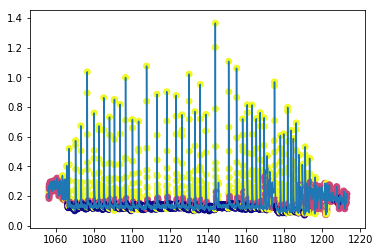

In [108]:
plt.figure("p.3")
plt.plot(ts[0][0], ts[0][1])
plt.scatter(ts[0][0], ts[0][1], c = stavy, cmap = plt.cm.plasma)
plt.show()